# animelytics! >///<
    CIS 545 | Carol Li | 10501401

### project structure, information
#### structure
1. **exploratory data analysis:** statistics, average, genre, ratings.
2. **feature selection and engineering**
    * drop unecessary columns with unecessary features
3. **modelling**
    * baseline model: linear regression.
    * comparison model: NN (?) decide when get here lol

#### links
https://www.kaggle.com/azathoth42/myanimelist

**using:**
* `anime_cleaned.csv`
* `animelist_cleaned.csv`

submission requires presentation, blog post, or session with craig.

## **0.** Packages and Data

In [1]:
# installing required packages
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb

# baseline regression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn import metrics
from sklearn.tree import export_graphviz
from matplotlib import rcParams

# graph display
import joblib
import pydot
from IPython.display import Image

In [2]:
# loading animelist data
# TODO: find use for this ;-;
animelist_data = './data/animelists_cleaned.csv'
animelist_df = pd.read_csv(animelist_data)
animelist_df

username  anime_id  my_watched_episodes my_start_date  \
0                 karthiga        21                  586    0000-00-00   
1                 karthiga        59                   26    0000-00-00   
2                 karthiga        74                   26    0000-00-00   
3                 karthiga       120                   26    0000-00-00   
4                 karthiga       178                   26    0000-00-00   
...                    ...       ...                  ...           ...   
31284025     Yokonightcore     15611                   48    2014-00-00   
31284026     Yokonightcore     27815                   22    0000-00-00   
31284027            wargod      5945                   39    0000-00-00   
31284028  JMc_SetoKai_LoVe      1316                   52    0000-00-00   
31284029    hinogurl_mikha      1744                   58    0000-00-00   

         my_finish_date  my_score  my_status  my_rewatching  my_rewatching_ep  \
0            0000-00-00         9          1            NaN                 0   
1            0000-00-00         7          2            NaN                 0   
2            0000-00-00         7          2            NaN                 0   
3            0000-00-00         7          2            NaN                 0   
4            0000-00-00         7          2            0.0                 0   
...                 ...       ...        ...            ...               ...   
31284025     0000-00-00         9          1            NaN                 0   
31284026     0000-00-00         9          1            NaN                 0   
31284027     0000-00-00         8          2            0.0                 0   
31284028     0000-00-00         9          2            NaN                 0   
31284029     0000-00-00        10          1            0.0                 0   

              my_last_updated my_tags  
0         2013-03-03 10:52:53     NaN  
1         2013-03-10 13:54:51     NaN  
2         2013-04-27 16:43:35     NaN  
3         2013-03-03 10:53:57     NaN  
4         2013-03-27 15:59:13     NaN  
...                       ...     ...  
31284025  2015-09-07 17:33:03     NaN  
31284026  2015-09-07 17:32:05     NaN  
31284027  2010-03-29 04:24:12     NaN  
31284028  2009-12-23 05:45:14     NaN  
31284029  2008-04-05 11:36:20     NaN  

[31284030 rows x 11 columns]

In [3]:
# loading anime rating data
anime_data = './data/anime_cleaned.csv'
anime_df = pd.read_csv(anime_data)

**notes on columns:**
* rating refers to maturity rating
* scored by refers to number of ratings for data

In [4]:
# all columns of anime_df
anime_df.columns

Index(['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme', 'duration_min',
       'aired_from_year'],
      dtype='object')

In [5]:
# all genres of values in anime_df
for genre in anime_df['genre']:
    print('***')
    print(genre)
    
# TODO: want to split by each individual value and put into separate columns - is this possible? -> look at tds link

***
Comedy, Supernatural, Romance, Shounen
***
Comedy, Parody, Romance, School, Shounen
***
Comedy, Magic, School, Shoujo
***
Comedy, Drama, Magic, Romance, Fantasy
***
Comedy, Drama, Romance, Shounen
***
Kids, School, Shoujo
***
Magic, Comedy, Romance, School, Shoujo
***
Action, Drama, Fantasy, Romance, School, Supernatural
***
Music, Slice of Life, Comedy, Romance, Josei
***
Comedy, Harem, Romance, School, Shoujo
***
Comedy, Drama, Romance, Shounen Ai
***
Comedy, Romance, School, Shoujo
***
Comedy, Drama, Romance, Shounen Ai
***
Slice of Life, Comedy, Romance, School, Shoujo
***
Action, Adventure, Comedy, Super Power, Supernatural, Shounen
***
Sci-Fi, Comedy, Drama, Romance, Ecchi, Seinen
***
Slice of Life, Drama, Romance, School, Shoujo
***
Action, Adventure, Comedy, Super Power, Martial Arts, Shounen
***
Slice of Life, Comedy, Martial Arts, Fantasy
***
Slice of Life, Comedy, Romance, School
***
Comedy, Drama, Romance, Shounen
***
Comedy, School, Shoujo, Super Power
***
Comedy, Dram

Action
***
Mystery, Historical, Drama, Samurai, Seinen
***
Music
***
Comedy, Demons, Fantasy, Horror, Shounen, Supernatural
***
Action, Comedy, Supernatural, Magic, Shounen Ai
***
Comedy, Harem, Romance, Slice of Life
***
Action, Comedy, Samurai
***
Music, Slice of Life, Shoujo
***
Action, Seinen
***
Sci-Fi, Space, Drama, Mecha
***
Action, Comedy, Fantasy, Shounen
***
Ecchi, Harem, Seinen
***
Hentai
***
Comedy, Ecchi, Harem, Romance, School
***
Harem, Comedy, Supernatural, School
***
Slice of Life, Comedy
***
Drama, Fantasy, Magic, Shoujo
***
Drama, Shounen Ai
***
Comedy, Kids, Fantasy
***
Music, Sports
***
Drama, Romance, Sci-Fi, Yaoi
***
Sci-Fi, Adventure, Comedy
***
Action, Adventure, Fantasy
***
Hentai, Magic
***
Slice of Life, Comedy
***
Comedy, Drama, Romance, School, Shoujo, Slice of Life
***
Action, Historical, Military, Super Power
***
Action, Adventure, Fantasy, Shounen
***
Drama, Fantasy
***
Action, Comedy, School, Shoujo Ai
***
Music
***
Comedy, Parody
***
Comedy
***
Action

***
School, Supernatural
***
Action, Sci-Fi, Harem, Comedy, Romance, Ecchi, Fantasy, School
***
Action, Comedy, Romance, School
***
Comedy, School, Shounen, Sports
***
Romance, School, Shoujo
***
Game, Psychological
***
Romance, Shoujo
***
Comedy, Kids, Magic, Military, Sci-Fi
***
Adventure, Kids
***
Action, Comedy, Romance, Fantasy, School, Shounen
***
Action, Adventure, Fantasy, Comedy
***
Ecchi, Drama
***
Music
***
Comedy, School, Seinen, Slice of Life
***
Action, Adventure, Drama, Shounen, Supernatural
***
Action, Harem, Demons, Romance, Ecchi, Fantasy
***
Romance, School, Shoujo
***
Kids, Adventure, Fantasy, Magic
***
Comedy, Ecchi, Slice of Life
***
Action, Military, Sci-Fi, Adventure, Space, Drama, Mecha
***
Action, Adventure, Mecha, Military, Romance, Sci-Fi, Space
***
Fantasy, Magic, Comedy, Shoujo
***
Game
***
Hentai, Demons, Supernatural
***
Game, Slice of Life, School
***
Drama, Historical
***
Action, Harem, Comedy, Supernatural, Magic, Ecchi
***
Comedy, Drama, Fantasy, Mag

Sci-Fi, Space
***
Sports, School, Shounen
***
Hentai
***
Game, Slice of Life, Comedy, School
***
Comedy, Kids, Slice of Life
***
Comedy, Kids
***
Comedy, Romance, Supernatural
***
Comedy, School, Slice of Life
***
Comedy, Romance, Shoujo, Slice of Life
***
Comedy, Fantasy, Parody
***
Comedy, Parody
***
Sci-Fi, Drama, Romance
***
Sci-Fi, Comedy, Police, Mecha
***
Comedy, Sports, Shounen
***
Fantasy, Magic, Romance, Shoujo
***
Drama, Magic, Shoujo
***
Music, Drama, Romance, Fantasy, School
***
Action, Horror, Demons, Drama, Vampire, Shoujo
***
Comedy, School, Shounen, Sports
***
Action, Fantasy, Sci-Fi
***
Ecchi, Comedy, Mecha, Seinen
***
Action, Adventure, Historical
***
Comedy, Drama
***
Comedy, Drama, Fantasy, Magic, Romance, Shoujo
***
Adventure, Fantasy, Kids
***
Comedy, Military, Historical
***
Comedy, School, Seinen, Slice of Life
***
Action, Adventure, Historical, Demons, Martial Arts, Samurai, Shounen
***
Psychological, Supernatural, Drama, Mystery, Seinen
***
Comedy, Romance, S

Fantasy, Sci-Fi, Shounen, Slice of Life
***
Action, Adventure, Demons, Drama, Fantasy, Horror, Military, Romance, Seinen, Supernatural
***
Action, Harem, Comedy, Magic, Romance, Ecchi, Fantasy, School, Shounen
***
Action, Comedy, Historical, Demons, Supernatural, Fantasy
***
Action, Super Power, Magic
***
Action, Comedy, Drama, Magic, Seinen
***
Slice of Life
***
Action, Sci-Fi, Adventure, Space
***
Game, School, Slice of Life
***
Comedy
***
Comedy, Supernatural, Romance, Shounen
***
Hentai
***
Comedy, Sci-Fi, Slice of Life
***
Hentai, Yaoi
***
Action, Drama, Mecha, Military, Sci-Fi
***
Comedy, Romance, School
***
Comedy, Ecchi, Harem, Sci-Fi, Shounen, Supernatural
***
Harem, Comedy, Romance, School
***
Action, Comedy, Magic, Fantasy
***
Adventure, Historical, Kids, Drama
***
Slice of Life, Ecchi
***
Adventure, Slice of Life, Mystery, Historical, Supernatural, Fantasy, Seinen
***
Adventure, Comedy, Fantasy, Sci-Fi, Shounen
***
Music, Space
***
Hentai
***
Comedy
***
Fantasy, Dementia, D

***
Drama, Romance, School
***
Historical, Parody
***
Action, Comedy, Police, Shounen
***
Fantasy, Kids
***
Sci-Fi, Magic, Fantasy
***
Comedy, Romance, Slice of Life
***
Action, Supernatural, Fantasy
***
School
***
Comedy, Parody, Ecchi, Fantasy
***
Comedy, School, Shounen
***
Comedy
***
Action, Comedy, Supernatural, Martial Arts, Shounen
***
Comedy, Ecchi, Shounen, Sports
***
Comedy, Demons, Supernatural, Romance, Fantasy, Shoujo
***
Sci-Fi, Comedy, Kids
***
Action, Sci-Fi, Space, Horror, Drama, Seinen
***
Harem, Mystery, Comedy, Romance, Ecchi, School
***
Comedy, School, Slice of Life
***
Action, Sci-Fi, Adventure, Comedy, Fantasy, Shounen
***
Action, Sci-Fi, Adventure
***
Action, Adventure, Comedy, Mystery, Romance
***
Comedy, Historical, Parody
***
Action, Harem, Demons, Romance, Ecchi, Fantasy
***
Action, Adventure, Comedy, Shounen
***
Action, Drama, Horror, School, Seinen, Supernatural
***
Comedy, Magic, Fantasy
***
Slice of Life, Comedy
***
Sci-Fi, Adventure, Mecha, Shounen
***


***
Comedy, Drama, Mecha, Sci-Fi
***
Music, Slice of Life, Mystery, Romance, School
***
Slice of Life, Comedy, Romance, Josei
***
Hentai
***
Mystery
***
Action, Comedy, Police, Seinen
***
Comedy, Sci-Fi
***
Action, Adventure, Fantasy
***
Adventure, Supernatural, Fantasy, Shounen
***
Comedy, Horror
***
Comedy, Magic
***
Sci-Fi, Adventure
***
Comedy, Sports, Drama, Shounen
***
Hentai
***
Comedy, Demons, Ecchi, Shounen
***
Music
***
Action, Adventure, Kids
***
Comedy, Harem, Romance, Supernatural, Shounen
***
Action, Comedy, Horror, Mystery, Vampire
***
Kids
***
Comedy, Kids, Fantasy
***
Adventure, Comedy, Fantasy, Kids, Magic, Parody
***
Action, Comedy, Kids
***
Comedy, Historical, School, Seinen, Sports
***
Action, Adventure, Mecha, Sci-Fi, Shounen
***
Action, Supernatural, Fantasy
***
Adventure, Fantasy, Historical, Romance
***
Action, Horror, Sci-Fi
***
Slice of Life
***
Action, Mecha, Sci-Fi
***
Action, Adventure, Comedy, Fantasy, Shounen
***
Hentai
***
Game, Adventure, Kids, Fantasy

Adventure, Historical, Supernatural, Martial Arts, Fantasy
***
Comedy
***
Comedy, Ecchi, Fantasy, Harem, Magic, Romance, School, Shounen, Super Power, Supernatural
***
Action, Military, Sci-Fi, Magic, Ecchi
***
Comedy, School, Slice of Life
***
Harem, Comedy, Romance, Ecchi, Fantasy, Seinen
***
Adventure, Fantasy
***
Comedy, Drama, Romance, Ecchi
***
Drama, Hentai, Romance
***
Comedy, Historical
***
Adventure, Comedy, Fantasy, Magic, Romance, Shoujo
***
Action, Magic, Supernatural, Sci-Fi
***
Cars, Seinen, Sports
***
Comedy, Parody, Mecha
***
Action, Horror, Supernatural, Vampire, Seinen
***
Slice of Life, Fantasy, Drama
***
Action, Sci-Fi, School
***
Action, Fantasy, Super Power
***
Action, Adventure, Comedy, Supernatural, Shounen
***
Action, Comedy, Ecchi, Shoujo Ai, Super Power
***
Drama, Fantasy, Psychological, Supernatural
***
Adventure, Comedy, Drama, Fantasy, Magic, Romance, Shoujo
***
Action, Adventure, Comedy, Historical, Romance, Samurai
***
Hentai, School
***
Action, Music, 

Action, Comedy, School
***
Action, Demons, Fantasy, Horror, Romance
***
Action, Adventure, Comedy, Fantasy, Shounen
***
Action, Super Power
***
Mystery, Supernatural, Drama
***
Comedy, Shounen
***
Action, Adventure, Harem, Comedy, Magic, Romance, Ecchi, Fantasy, School
***
Action, Sci-Fi, Adventure, Comedy, Drama, Romance
***
Music, Kids, Drama, Fantasy
***
Action, Comedy, Mecha, Sci-Fi
***
Action, Military, Mystery, Super Power, Drama, Fantasy, Shounen
***
Slice of Life, Comedy
***
Comedy, Horror
***
Sci-Fi
***
Comedy, School, Shounen, Slice of Life
***
Comedy, Romance, School
***
Action, Comedy, Supernatural, School
***
Comedy, Ecchi, Harem, Romance, School, Sci-Fi, Shounen
***
Action, Police, Martial Arts, Romance, Drama, Seinen
***
Adventure, Comedy, Romance
***
Action, Supernatural, Demons, Drama, Horror, Sci-Fi, Shoujo
***
Action, Drama, Fantasy
***
Mecha, Police, Psychological, Sci-Fi
***
Action, Sci-Fi
***
Sci-Fi, Dementia, Psychological, Drama, Mecha
***
Comedy, Parody
***
Mag

Comedy, Parody, Sci-Fi
***
Action, Super Power, Sci-Fi
***
Historical, Josei, Romance
***
Magic
***
Action, Adventure, Sci-Fi, Shounen
***
Fantasy, Hentai, Supernatural
***
Fantasy, Romance, Drama, Shoujo
***
Drama
***
Adventure, Kids
***
Adventure, Comedy, Mystery, Police, Shounen
***
Action, Sci-Fi, Comedy, Historical, Parody, Samurai, Shounen
***
Action, Seinen
***
Music, Slice of Life, School, Shoujo
***
Music
***
Action, Adventure, Comedy, Ecchi, Sci-Fi
***
Slice of Life
***
Supernatural, Magic
***
Drama, Historical, Romance, Sci-Fi, Shounen Ai
***
Comedy, Martial Arts, Slice of Life, Sports
***
Adventure, Comedy, Supernatural, Drama, Shounen
***
Comedy, Drama, Romance, Yaoi
***
Music
***
Comedy, Fantasy, Mystery
***
Game, School, Slice of Life
***
Comedy, Historical
***
Action, Adventure, Fantasy, Game, Romance
***
Action, Comedy, Magic, Romance, Fantasy, School, Shoujo
***
Action, Mecha, Supernatural, Drama, Sci-Fi
***
Game, Parody
***
Action, Adventure, Mystery, Magic, Fantasy


***
Comedy, Slice of Life
***
Comedy, Seinen, Slice of Life
***
Adventure, Demons, Fantasy
***
Comedy, Sci-Fi, Shounen
***
Action, Drama, Fantasy, Shounen, Super Power
***
Sci-Fi, Comedy, Parody, Kids
***
Comedy, Fantasy, Magic, Romance, Shoujo
***
Action, Super Power, Romance, Martial Arts, Shounen
***
Military, Sports, School
***
Fantasy, Kids, Magic, Shoujo
***
Dementia, Horror, Supernatural
***
Slice of Life, Comedy, Drama, Romance, Shounen Ai
***
Action, Sci-Fi, Adventure, Comedy, Drama, Shounen
***
Romance, School
***
Action, Adventure, Comedy, Supernatural, Shounen
***
Comedy, Historical
***
Music, Sci-Fi
***
Action, Kids, Mecha, Sci-Fi
***
Parody, School, Slice of Life
***
Hentai
***
Action, Sci-Fi, Supernatural, Magic, Romance, School
***
Action, Harem, Comedy, Demons, Romance, Ecchi, School
***
Action, Adventure, Martial Arts, Shounen
***
Comedy, Slice of Life
***
Action, Military, Romance, Sci-Fi, Space
***
Space, Mecha, Military, Sci-Fi
***
Kids, Adventure, Historical
***
C

***
Kids
***
Comedy, School, Slice of Life
***
Comedy, Drama, Romance, Shounen Ai
***
Action, Military, Sci-Fi, Space, Drama
***
Action, Sci-Fi, Adventure, Space, Mecha
***
Adventure, Comedy, Demons, Fantasy, Shoujo
***
Action, Sci-Fi, Adventure, Sports, Shounen
***
Kids, Magic
***
Adventure, Drama, Fantasy, Shoujo
***
Fantasy
***
Action, Adventure, Comedy, Mecha, Sci-Fi
***
Comedy, Kids
***
Adventure, Comedy, Fantasy, Shounen
***
Drama, Romance, Sci-Fi
***
Hentai
***
Adventure, Fantasy
***
Action, Martial Arts, Comedy, School, Shounen
***
Adventure, Comedy, Slice of Life, Super Power
***
Action, Kids, Mecha
***
Action, Martial Arts, Historical
***
Comedy, Magic, Fantasy
***
Action, Magic
***
Sci-Fi, Adventure, Romance, Fantasy, Josei
***
Action, Drama, Shounen, Sports
***
Comedy, Fantasy, Kids
***
Adventure, Comedy, Mystery, Police, Shounen, Sports
***
Action, Fantasy, Magic, Shoujo
***
Adventure, Comedy, Fantasy, Historical, Shounen
***
Action, Sci-Fi, Adventure, Comedy, Fantasy, Sho

Sci-Fi, Adventure, Mecha, Shounen
***
Action, Mecha, Historical
***
Comedy, Mystery, Super Power
***
Music, Slice of Life, School, Shoujo
***
Action, Mystery, Supernatural, Drama, Romance, Thriller
***
Comedy, School
***
Horror, Mystery, Romance, School, Shounen, Supernatural
***
Action, Ecchi, Comedy, Harem, Romance, Demons, School
***
Action, Adventure, Drama, Mecha, Sci-Fi
***
Romance, Shoujo
***
Action, Historical, Samurai
***
Action, Fantasy
***
Music
***
Action, Adventure, Comedy, Drama, Fantasy, Shounen
***
Comedy, Romance, Sci-Fi
***
Action, Sci-Fi, Horror
***
Action, Adventure, Drama, Fantasy
***
Action, Martial Arts, Hentai
***
Hentai
***
Comedy, Romance, School, Shounen
***
Mecha, Sci-Fi, Shounen, Sports
***
Adventure, Military, Romance
***
Action, Adventure, Fantasy, Supernatural, Historical, Drama
***
Action, Adventure, Comedy, Supernatural, Shounen
***
Comedy, Ecchi, Romance, Shounen, Slice of Life
***
Comedy, Drama, Ecchi, Harem, Romance, Sci-Fi, Shounen, Supernatural
**

***
Drama, Romance, Slice of Life, Supernatural
***
Action, Sci-Fi, Comedy, Magic, Fantasy, Mecha, Shounen
***
Slice of Life, Comedy, Romance, School
***
Action, Fantasy, Shounen, Super Power
***
Action, Adventure, Demons, Fantasy, Magic, Supernatural
***
Music, Comedy, Supernatural, Drama, Romance, Shoujo
***
Action, Adventure, Mystery, Comedy, Police
***
Comedy, Ecchi, Romance, Supernatural
***
Slice of Life, Comedy
***
Action, Comedy, Magic, Shounen, Super Power, Supernatural
***
Demons, Magic, Romance, Shoujo
***
Action, Comedy, Magic, School, Shoujo
***
Adventure, Kids, Drama, Fantasy
***
Action, Ecchi, Harem, Martial Arts, School, Super Power
***
Comedy, Shoujo
***
Comedy, Slice of Life
***
Adventure, Comedy, Magic, Romance, Shoujo
***
Comedy, Sci-Fi, Slice of Life, Sports
***
Action, Adventure, Drama, Thriller, Seinen
***
Comedy, Romance, School
***
School, Slice of Life
***
Action, Adventure, Comedy, Kids, Mecha, Sci-Fi, Shounen, Super Power
***
Music, Comedy
***
Action, Comedy

In [6]:
# all studios of values in anime_df -> easy grouping
for studio in anime_df['studio']:
    print('***')
    print(studio)

***
David Production
***
Gonzo
***
Satelight
***
Hal Film Maker
***
J.C.Staff
***
Studio Pierrot, Studio Hibari
***
Production Reed
***
J.C.Staff
***
J.C.Staff
***
Bones
***
Studio Deen
***
J.C.Staff
***
Studio Deen
***
Brain&#039;s Base
***
Studio Pierrot
***
Madhouse
***
Production I.G
***
Studio Pierrot
***
Studio Deen
***
J.C.Staff
***
J.C.Staff
***
Group TAC
***
Hal Film Maker
***
Madhouse
***
Studio Deen
***
Madhouse
***
TMS Entertainment
***
Pierrot Plus
***
Studio Pierrot
***
Tatsunoko Production
***
Hal Film Maker, TYO Animations
***
Shin-Ei Animation
***
Studio Deen
***
Madhouse
***
Toei Animation
***
Tokyo Movie Shinsha
***
Toei Animation
***
Madhouse
***
Sunrise
***
Zexcs
***
J.C.Staff
***
J.C.Staff
***
Sunrise
***
J.C.Staff
***
J.C.Staff
***
TMS Entertainment
***
Madhouse
***
J.C.Staff
***
Production I.G
***
Studio Deen
***
Studio Deen
***
Studio Deen
***
Yumeta Company
***
TMS Entertainment
***
Lerche
***
Studio Pierrot
***
Production I.G, Zexcs
***
Kachidoki Studio
***
G

Studio 3Hz
***
AIC
***
Kachidoki Studio
***
Seven
***
Toei Animation
***
Satelight
***
J.C.Staff
***
Haoliners Animation League
***
Artland, AIC, Artmic
***
Satelight
***
Group TAC
***
TMS Entertainment
***
AIC
***
Lerche
***
Artland
***
Future Planet, Beijing Huihuang Animation Company
***
Sunrise
***
CoMix Wave Films
***
Studio Ghibli
***
J.C.Staff
***
Shin-Ei Animation
***
Toei Animation
***
Studio Deen
***
Trigger
***
Sunrise
***
ufotable, feel., Studio Flag
***
AIC A.S.T.A.
***
ufotable
***
J.C.Staff
***
Think Corporation
***
SynergySP
***
Vasoon Animation
***
Kachidoki Studio
***
J.C.Staff
***
Gainax
***
A-1 Pictures
***
Arms
***
Toei Animation
***
Tezuka Productions
***
Lay-duce
***
Toei Animation
***
Shin-Ei Animation
***
A-1 Pictures
***
Gonzo
***
TMS Entertainment, Telecom Animation Film
***
Sunrise
***
David Production
***
Shaft
***
TMS Entertainment
***
Hal Film Maker
***
Shin-Ei Animation
***
Studio Matrix
***
Toei Animation
***
Nomad
***
Actas
***
Toei Animation
***
Bridg

***
Kinema Citrus
***
Shaft
***
Brain&#039;s Base
***
Diomedea
***
Doga Kobo
***
Toei Animation
***
Kyoto Animation
***
Haoliners Animation League
***
Studio Comet
***
J.C.Staff
***
Tatsunoko Production
***
J.C.Staff
***
Indeprox
***
Kinema Citrus
***
Craftar
***
Toei Animation
***
AIC
***
Satelight
***
LIDENFILMS
***
Studio Deen
***
Sunrise
***
Production I.G
***
TMS Entertainment
***
Nippon Animation
***
Ajia-Do
***
ufotable
***
Studio Pierrot
***
Kachidoki Studio
***
Hoods Entertainment, teamKG
***
Diomedea
***
Nippon Animation
***
D &amp; D Pictures
***
Vega Entertainment
***
Toei Animation
***
Lerche
***
Sunrise
***
Sunrise
***
Studio Pierrot, Studio Deen
***
Toei Animation
***
Production IMS
***
Studio Deen
***
Gonzo, Asread
***
Hoods Entertainment
***
PoRO
***
Shin-Ei Animation
***
Seven
***
Studio Deen
***
Sunrise
***
A-1 Pictures
***
Signal. MD
***
Studio Deen
***
LIDENFILMS
***
OLM
***
Production I.G
***
Madhouse
***
Kyoto Animation, Tatsunoko Production
***
ufotable
***
Stud

***
Studio PuYUKAI
***
Sunrise
***
P.A. Works
***
GoHands
***
Sunrise
***
Studio Comet
***
OLM
***
AIC Plus+
***
Xebec
***
OLM
***
TMS Entertainment
***
Production I.G
***
AIC
***
Ordet, LIDENFILMS
***
Gainax
***
Madhouse
***
Kamikaze Douga
***
Studio PuYUKAI
***
TMS Entertainment, Shin-Ei Animation
***
Studio Pierrot
***
Zexcs
***
OLM
***
8bit
***
Silver Link.
***
Shin-Ei Animation
***
Telecom Animation Film
***
Gonzo
***
Studio 4°C
***
Eiken
***
Production I.G
***
Lerche
***
Office Takeout
***
Sunrise
***
Toei Animation
***
Nippon Animation
***
Toei Animation
***
Studio Matrix
***
Shin-Ei Animation
***
Lerche
***
Studio Ppuri
***
Studio Hibari
***
Bandai Namco Pictures
***
Platinum Vision
***
Studio Pierrot
***
Sunrise
***
Studio Pierrot
***
Trigger
***
Brain&#039;s Base
***
Remic
***
Madhouse
***
Project No.9, A-Real
***
TMS Entertainment
***
Studio Pierrot
***
AIC, BeSTACK
***
Bones
***
Xebec
***
C-Station
***
Gonzo, Gainax, Production I.G, Madhouse, Studio 4°C, Satelight, CoMix Wa

Shuka
***
Studio Pierrot
***
TMS Entertainment
***
AIC
***
Kenji Studio
***
EMT²
***
LandQ studios
***
Madhouse
***
Wawayu Animation
***
Telecom Animation Film
***
Production Reed
***
Toei Animation
***
Flavors Soft
***
Kyoto Animation
***
Studio Comet
***
Sunrise
***
A-1 Pictures
***
Wit Studio
***
A-1 Pictures
***
Flavors Soft
***
Haoliners Animation League
***
Studio 3Hz
***
Trans Arts
***
Studio Pierrot
***
TMS Entertainment
***
Madhouse
***
Kachidoki Studio
***
Bones
***
Madhouse
***
David Production
***
Joker Films
***
AIC
***
TMS Entertainment
***
Studio Deen
***
Sunrise
***
P.A. Works
***
Sunrise
***
J.C.Staff
***
Bones
***
AIC
***
Sunrise
***
OLM
***
SynergySP
***
Tatsunoko Production
***
Studio 4°C
***
Telecom Animation Film
***
TMS Entertainment
***
OLM Digital
***
Lerche
***
Studio Khronos
***
Toei Animation
***
LIDENFILMS
***
Studio Pierrot
***
Studio Pierrot
***
Millepensee
***
Sunrise
***
Production I.G
***
Madhouse
***
Studio Ghibli
***
White Fox
***
J.C.Staff
***
Nomad

J.C.Staff
***
MAPPA
***
Daichi Doga, Dongyang Animation
***
Studio Deen
***
WAO World
***
PoRO
***
feel.
***
TMS Entertainment
***
Tatsunoko Production, Ordet
***
Arms
***
Studio 4°C
***
Sunrise
***
Nippon Animation
***
Production I.G
***
AIC
***
OLM
***
Gakken Eigakyoku
***
Studio Pierrot
***
Toei Animation
***
Studio Jam
***
Madhouse
***
Studio Deen
***
AIC A.S.T.A.
***
Gainax
***
Gonzo
***
Studio 4°C
***
Bee Train
***
Xebec
***
Nippon Animation
***
NHK
***
OLM
***
Kokusai Eigasha
***
Artland
***
Group TAC, View Works
***
Toei Animation
***
Xebec Zwei
***
A-1 Pictures
***
J.C.Staff, A.C.G.T.
***
E&amp;G Films
***
Sunrise
***
Madhouse
***
Toei Animation
***
Kachidoki Studio
***
Telescreen BV
***
Asahi Production
***
Madhouse
***
Gathering
***
Madhouse
***
TMS Entertainment
***
Moss Design Unit
***
J.C.Staff
***
Actas
***
Madhouse
***
AIC A.S.T.A.
***
Sunrise
***
J.C.Staff
***
Gathering
***
J.C.Staff
***
Studio Jam
***
Polygon Pictures
***
T-Rex
***
Tsuchida Productions
***
Phoenix Ent

***
Visual 80
***
Sunrise
***
Asahi Production
***
Anime Antenna Iinkai
***
Sunrise
***
Production I.G
***
Nippon Animation
***
Production I.G
***
Toei Animation
***
feel.
***
SynergySP
***
Studio Fantasia
***
Sunrise
***
Toei Animation
***
Studio Deen
***
Flavors Soft
***
Haoliners Animation League
***
Studio Ghibli
***
PoRO
***
Toei Animation
***
Life Work
***
Doga Kobo
***
Mushi Production
***
Toei Animation
***
Wit Studio
***
Bandai Namco Pictures
***
Studio Pierrot
***
Studio Pierrot
***
Actas
***
Toei Animation
***
ILCA
***
Studio Deen
***
Madhouse
***
Qualia Animation
***
Bones
***
TMS Entertainment
***
Satelight
***
OLM
***
Yaoyorozu
***
Office Take Off
***
Madhouse
***
TNK
***
Toei Animation
***
Shin-Ei Animation
***
Sunrise
***
Sunrise
***
Nippon Animation
***
OLM
***
MMDGP
***
TMS Entertainment
***
Bee Train, Xebec
***
P.A. Works
***
Kachidoki Studio
***
Magic Bus
***
Nippon Animation
***
Nomad
***
OLM
***
Gonzo
***
Toei Animation
***
Studio Pierrot
***
AIC, Darts
***
Shaft


***
Studio Ghibli
***
feel.
***
Telecom Animation Film
***
P.A. Works
***
Gathering, Lesprit
***
Asread
***
Puzzle Animation Studio Limited
***
Gathering
***
Shaft
***
Passione
***
Anime Antenna Iinkai
***
8bit
***
The Answer Studio
***
Tezuka Productions
***
Kinema Citrus
***
Kyoto Animation
***
Tokyo Kids
***
Craftar
***
Tatsunoko Production, Dongwoo A&amp;E
***
Eiken
***
Bones
***
AT-2
***
ufotable
***
David Production
***
Studio Gallop
***
Studio Deen
***
A-1 Pictures
***
Studio Blanc
***
Brain&#039;s Base
***
Gainax
***
Creators in Pack
***
Toei Animation
***
Signal. MD
***
Tatsunoko Production
***
Toei Animation
***
Toei Animation
***
Marza Animation Planet
***
Studio Pierrot
***
Toei Animation
***
Studio Hibari
***
Pie in The Sky
***
A-1 Pictures
***
AIC Spirits
***
ufotable
***
Ripple Film
***
Silver Link.
***
Tokyo Movie Shinsha
***
Production Reed
***
Doga Kobo
***
Hoods Entertainment
***
Studio Deen
***
Shaft
***
Gainax, feel.
***
MAPPA
***
Studio Gokumi
***
Office DCI
***
A

A-1 Pictures
***
Shaft
***
Toei Animation
***
J.C.Staff
***
Satelight
***
Production I.G
***
Onionskin
***
TMS Entertainment
***
WAO World
***
Gathering
***
Sunrise
***
SANZIGEN
***
Studio Pierrot
***
Studio Gallop
***
Studio 9 MAiami
***
Shaft
***
Studio Deen
***
Office Takeout
***
Toei Animation
***
Xebec
***
Phoenix Entertainment
***
P.A. Works
***
Production I.G
***
Seven Arcs
***
Passione
***
D.A.S.T.
***
Sunrise
***
Khara, Trigger
***
White Fox
***
Ajia-Do
***
Actas
***
W-Toon Studio
***
Arms
***
Khara
***
Toei Animation
***
TMS Entertainment
***
Madhouse
***
Signal. MD
***
Gainax
***
Gonzo
***
Kachidoki Studio
***
feel.
***
Khara
***
PoRO
***
Creators in Pack
***
Madhouse
***
Trigger
***
Madhouse
***
Toei Animation
***
Production I.G
***
Madhouse
***
Moss Design Unit
***
Seven
***
MAPPA
***
J.C.Staff
***
feel.
***
RG Animation Studios
***
Asread
***
Fukushima Gainax
***
Bee Train
***
Production IMS
***
Xebec, Issen
***
Brain&#039;s Base
***
Gainax
***
Sparkly Key Animation Studi

In [7]:
# all airing years in anime_df
for date in anime_df['aired_from_year']:
    print('***')
    print(date)

***
2012.0
***
2007.0
***
2008.0
***
2002.0
***
2012.0
***
2009.0
***
2003.0
***
2007.0
***
2008.0
***
2006.0
***
2008.0
***
2010.0
***
2011.0
***
2012.0
***
2004.0
***
2002.0
***
2009.0
***
2007.0
***
1989.0
***
2008.0
***
2011.0
***
2004.0
***
2008.0
***
2013.0
***
2006.0
***
2011.0
***
2008.0
***
2011.0
***
2009.0
***
2011.0
***
2010.0
***
1992.0
***
2001.0
***
2006.0
***
1999.0
***
2005.0
***
2006.0
***
2007.0
***
2000.0
***
2010.0
***
2010.0
***
2006.0
***
2012.0
***
2010.0
***
2007.0
***
2012.0
***
1998.0
***
2000.0
***
2011.0
***
2011.0
***
2007.0
***
2008.0
***
2006.0
***
2016.0
***
2017.0
***
2002.0
***
2015.0
***
2016.0
***
1998.0
***
2011.0
***
2000.0
***
2010.0
***
2016.0
***
2016.0
***
2013.0
***
2008.0
***
2015.0
***
1997.0
***
2018.0
***
2016.0
***
2014.0
***
1994.0
***
2010.0
***
2001.0
***
2010.0
***
2005.0
***
2006.0
***
2010.0
***
2013.0
***
2016.0
***
2004.0
***
2014.0
***
2015.0
***
2013.0
***
2017.0
***
2017.0
***
1978.0
***
2017.0
***
1997.0
***
2015.0
***
2018.0

***
2018.0
***
2008.0
***
2016.0
***
2018.0
***
2008.0
***
2010.0
***
2015.0
***
1973.0
***
2016.0
***
2003.0
***
1997.0
***
2015.0
***
1991.0
***
1980.0
***
2013.0
***
2011.0
***
2011.0
***
2015.0
***
2014.0
***
2012.0
***
1995.0
***
1994.0
***
2012.0
***
2017.0
***
2012.0
***
1985.0
***
2011.0
***
2007.0
***
2015.0
***
1998.0
***
2010.0
***
2007.0
***
2017.0
***
2015.0
***
2018.0
***
2016.0
***
2005.0
***
2012.0
***
2008.0
***
2007.0
***
2012.0
***
2014.0
***
2007.0
***
1994.0
***
1981.0
***
2017.0
***
2007.0
***
2001.0
***
2014.0
***
2014.0
***
2012.0
***
2017.0
***
2013.0
***
2005.0
***
1993.0
***
2013.0
***
2013.0
***
2015.0
***
2011.0
***
2015.0
***
2015.0
***
1984.0
***
1990.0
***
2013.0
***
2002.0
***
1989.0
***
2011.0
***
2005.0
***
1989.0
***
1996.0
***
2016.0
***
2017.0
***
2009.0
***
1982.0
***
1987.0
***
2006.0
***
2010.0
***
2012.0
***
2016.0
***
2015.0
***
2013.0
***
2008.0
***
1995.0
***
2013.0
***
1991.0
***
2012.0
***
2010.0
***
2016.0
***
2014.0
***
2015.0
***
2005.0

***
2016.0
***
2014.0
***
2014.0
***
2014.0
***
1986.0
***
2014.0
***
1978.0
***
2012.0
***
2014.0
***
2005.0
***
1992.0
***
2013.0
***
2016.0
***
1990.0
***
2014.0
***
2016.0
***
2013.0
***
2015.0
***
2007.0
***
2015.0
***
2003.0
***
2007.0
***
2015.0
***
2009.0
***
2009.0
***
2017.0
***
1973.0
***
2011.0
***
2015.0
***
2017.0
***
1991.0
***
2015.0
***
2000.0
***
1996.0
***
1980.0
***
2002.0
***
2018.0
***
2014.0
***
2003.0
***
2007.0
***
2007.0
***
2000.0
***
2002.0
***
2012.0
***
2003.0
***
2002.0
***
2009.0
***
1992.0
***
2008.0
***
2012.0
***
2006.0
***
2012.0
***
2015.0
***
2014.0
***
2002.0
***
2001.0
***
2015.0
***
2012.0
***
2017.0
***
2016.0
***
2015.0
***
2014.0
***
2015.0
***
2008.0
***
2011.0
***
2010.0
***
2005.0
***
1991.0
***
1999.0
***
2012.0
***
2011.0
***
2008.0
***
2013.0
***
2009.0
***
1999.0
***
2005.0
***
2017.0
***
2006.0
***
2012.0
***
1976.0
***
2015.0
***
2009.0
***
2014.0
***
2017.0
***
1995.0
***
1992.0
***
2011.0
***
2016.0
***
2008.0
***
1979.0
***
2008.0

2005.0
***
2016.0
***
2011.0
***
2016.0
***
1999.0
***
2015.0
***
2000.0
***
2006.0
***
2006.0
***
2004.0
***
2000.0
***
2012.0
***
1994.0
***
2017.0
***
2005.0
***
2012.0
***
2011.0
***
2016.0
***
2016.0
***
1993.0
***
2003.0
***
2016.0
***
2010.0
***
2008.0
***
2016.0
***
2002.0
***
2017.0
***
2010.0
***
1995.0
***
2001.0
***
2014.0
***
2017.0
***
2007.0
***
2016.0
***
1997.0
***
2007.0
***
2012.0
***
2016.0
***
2007.0
***
2014.0
***
1995.0
***
1992.0
***
2008.0
***
2014.0
***
2003.0
***
2017.0
***
2007.0
***
2017.0
***
2016.0
***
2011.0
***
2008.0
***
2008.0
***
1989.0
***
1992.0
***
2002.0
***
2018.0
***
2006.0
***
2008.0
***
2012.0
***
2016.0
***
1994.0
***
1989.0
***
2015.0
***
1979.0
***
2010.0
***
2009.0
***
1985.0
***
2008.0
***
2017.0
***
2014.0
***
1968.0
***
2012.0
***
2016.0
***
2012.0
***
2018.0
***
2011.0
***
2014.0
***
1982.0
***
2007.0
***
2013.0
***
1998.0
***
2012.0
***
2009.0
***
2011.0
***
2016.0
***
2015.0
***
2010.0
***
2014.0
***
2016.0
***
2015.0
***
1993.0
***

***
2014.0
***
2017.0
***
2012.0
***
2015.0
***
2016.0
***
2015.0
***
2009.0
***
2008.0
***
2003.0
***
2016.0
***
2014.0
***
2002.0
***
2017.0
***
2017.0
***
1988.0
***
2005.0
***
2010.0
***
2014.0
***
2012.0
***
2016.0
***
2015.0
***
2015.0
***
2010.0
***
2011.0
***
2016.0
***
2014.0
***
2015.0
***
2010.0
***
2016.0
***
2015.0
***
2013.0
***
1985.0
***
2011.0
***
2018.0
***
2007.0
***
2008.0
***
2011.0
***
2018.0
***
2012.0
***
2007.0
***
2002.0
***
2013.0
***
1987.0
***
2016.0
***
1971.0
***
2006.0
***
2018.0
***
1987.0
***
1989.0
***
1996.0
***
2001.0
***
2013.0
***
2008.0
***
2013.0
***
2017.0
***
2011.0
***
2007.0
***
2008.0
***
1992.0
***
1996.0
***
2005.0
***
2003.0
***
2009.0
***
2018.0
***
2016.0
***
2017.0
***
2011.0
***
2011.0
***
2005.0
***
2006.0
***
2007.0
***
2004.0
***
1986.0
***
2003.0
***
1990.0
***
2017.0
***
2000.0
***
2015.0
***
2012.0
***
2017.0
***
2016.0
***
2008.0
***
2018.0
***
1983.0
***
2007.0
***
2008.0
***
2011.0
***
1998.0
***
2008.0
***
2001.0
***
1999.0

***
2014.0
***
2015.0
***
2017.0
***
1999.0
***
2018.0
***
2014.0
***
1994.0
***
2010.0
***
1986.0
***
2013.0
***
2017.0
***
2003.0
***
2015.0
***
1992.0
***
2010.0
***
2010.0
***
2015.0
***
2003.0
***
2000.0
***
2006.0
***
1990.0
***
1986.0
***
2013.0
***
2014.0
***
2004.0
***
2016.0
***
2017.0
***
1983.0
***
1992.0
***
2016.0
***
2015.0
***
2010.0
***
2017.0
***
2000.0
***
2012.0
***
1970.0
***
1996.0
***
2009.0
***
2010.0
***
1987.0
***
2015.0
***
1972.0
***
2005.0
***
2008.0
***
1995.0
***
2010.0
***
2016.0
***
2005.0
***
2013.0
***
2008.0
***
2015.0
***
2017.0
***
2005.0
***
2015.0
***
2002.0
***
2017.0
***
2016.0
***
2008.0
***
2016.0
***
2017.0
***
2011.0
***
2017.0
***
2015.0
***
1996.0
***
2016.0
***
1998.0
***
2014.0
***
1964.0
***
2005.0
***
1973.0
***
1979.0
***
2016.0
***
1993.0
***
1995.0
***
2016.0
***
1980.0
***
2014.0
***
1982.0
***
2015.0
***
2013.0
***
1977.0
***
2017.0
***
2014.0
***
1991.0
***
2001.0
***
2015.0
***
2014.0
***
2017.0
***
2016.0
***
1992.0
***
2013.0

2012.0
***
2015.0
***
2011.0
***
1997.0
***
2012.0
***
2008.0
***
2009.0
***
2010.0
***
2015.0
***
2017.0
***
2016.0
***
1991.0
***
2009.0
***
2009.0
***
2016.0
***
2008.0
***
2012.0
***
2012.0
***
2012.0
***
2015.0
***
2017.0
***
2011.0
***
2013.0
***
2001.0
***
1988.0
***
2012.0
***
1979.0
***
1990.0
***
2004.0
***
2012.0
***
2014.0
***
1997.0
***
2012.0
***
2002.0
***
1998.0
***
1988.0
***
1994.0
***
2001.0
***
2005.0
***
2016.0
***
2004.0
***
2011.0
***
2014.0
***
2014.0
***
2014.0
***
2016.0
***
2017.0
***
2008.0
***
1993.0
***
2001.0
***
2004.0
***
2007.0
***
2012.0
***
1999.0
***
2008.0
***
2005.0
***
2018.0
***
2013.0
***
2017.0
***
1985.0
***
1983.0
***
2016.0
***
1986.0
***
2012.0
***
2009.0
***
2000.0
***
2013.0
***
1995.0
***
2007.0
***
2008.0
***
2003.0
***
1989.0
***
1996.0
***
2012.0
***
2015.0
***
2015.0
***
2016.0
***
2004.0
***
2013.0
***
2011.0
***
1999.0
***
1997.0
***
2016.0
***
2016.0
***
2009.0
***
2009.0
***
2012.0
***
1981.0
***
2015.0
***
2013.0
***
2012.0
***

***
2016.0
***
2016.0
***
2001.0
***
2009.0
***
1980.0
***
2012.0
***
1986.0
***
2016.0
***
2004.0
***
2016.0
***
1971.0
***
2006.0
***
2008.0
***
2013.0
***
2018.0
***
2015.0
***
1997.0
***
2007.0
***
2010.0
***
2009.0
***
2012.0
***
2017.0
***
2010.0
***
2005.0
***
2006.0
***
1991.0
***
2017.0
***
1985.0
***
2016.0
***
2014.0
***
2010.0
***
2006.0
***
2003.0
***
2012.0
***
2015.0
***
2014.0
***
2010.0
***
2016.0
***
2008.0
***
1996.0
***
2012.0
***
1998.0
***
2006.0
***
2017.0
***
1999.0
***
2001.0
***
2018.0
***
2001.0
***
1987.0
***
2016.0
***
2010.0
***
2013.0
***
2016.0
***
1988.0
***
2003.0
***
2008.0
***
2009.0
***
2011.0
***
2006.0
***
2014.0
***
1991.0
***
2010.0
***
2014.0
***
1999.0
***
2017.0
***
2013.0
***
2003.0
***
2008.0
***
2002.0
***
2007.0
***
1998.0
***
2017.0
***
2016.0
***
2007.0
***
2011.0
***
1999.0
***
2017.0
***
2014.0
***
2017.0
***
2010.0
***
1988.0
***
2016.0
***
2006.0
***
2007.0
***
2017.0
***
2011.0
***
2009.0
***
2011.0
***
2008.0
***
2013.0
***
1987.0

### Merging AnimeList and Anime Stats

Joining on shared column, `anime_id`.

We want to conduct analysis on user ratings on different anime. `animelist_df` contains user Anime Lists, where they rate the anime that they've watched.


In [8]:
merged_anime_df = pd.merge(animelist_df, anime_df, on='anime_id')
merged_anime_df

username  anime_id  my_watched_episodes my_start_date  \
0              karthiga        21                  586    0000-00-00   
1             Damonashu        21                  418    0000-00-00   
2                 bskai        21                   75    0000-00-00   
3                Slimak        21                  834    0000-00-00   
4         MistButterfly        21                  808    0000-00-00   
...                 ...       ...                  ...           ...   
31284025     animekanji     37896                    0    2018-05-19   
31284026      AnimeKhor     37896                    0    0000-00-00   
31284027         FeliX_     37620                    0    0000-00-00   
31284028    gasparsousa     37620                    0    0000-00-00   
31284029         Azurii     36818                    0    0000-00-00   

         my_finish_date  my_score  my_status  my_rewatching  my_rewatching_ep  \
0            0000-00-00         9          1            NaN                 0   
1            0000-00-00        10          1            0.0                 0   
2            0000-00-00         8          1            0.0                 0   
3            0000-00-00        10          1            0.0                 0   
4            0000-00-00         0          1            NaN                 0   
...                 ...       ...        ...            ...               ...   
31284025     0000-00-00         0          1            0.0                 0   
31284026     0000-00-00         0          6            0.0                 0   
31284027     0000-00-00         0          6            0.0                 0   
31284028     0000-00-00         0          6            0.0                 0   
31284029     0000-00-00         0          6            0.0                 0   

              my_last_updated  ...               broadcast  \
0         2013-03-03 10:52:53  ...  Sundays at 09:30 (JST)   
1         2009-09-30 07:39:05  ...  Sundays at 09:30 (JST)   
2         2010-06-15 21:31:23  ...  Sundays at 09:30 (JST)   
3         2018-05-01 12:05:21  ...  Sundays at 09:30 (JST)   
4         2018-04-04 20:55:34  ...  Sundays at 09:30 (JST)   
...                       ...  ...                     ...   
31284025  2018-05-19 10:41:31  ...                     NaN   
31284026  2018-05-18 14:58:34  ...                     NaN   
31284027  2018-04-22 17:58:24  ...                     NaN   
31284028  2018-04-23 02:30:52  ...                     NaN   
31284029  2017-11-22 00:25:32  ...                     NaN   

                                                    related  \
0         {'Adaptation': [{'mal_id': 13, 'type': 'manga'...   
1         {'Adaptation': [{'mal_id': 13, 'type': 'manga'...   
2         {'Adaptation': [{'mal_id': 13, 'type': 'manga'...   
3         {'Adaptation': [{'mal_id': 13, 'type': 'manga'...   
4         {'Adaptation': [{'mal_id': 13, 'type': 'manga'...   
...                                                     ...   
31284025  {'Prequel': [{'mal_id': 37895, 'type': 'anime'...   
31284026  {'Prequel': [{'mal_id': 37895, 'type': 'anime'...   
31284027  {'Other': [{'mal_id': 37619, 'type': 'anime', ...   
31284028  {'Other': [{'mal_id': 37619, 'type': 'anime', ...   
31284029                                                 []   

                                                   producer  \
0                                    Fuji TV, TAP, Shueisha   
1                                    Fuji TV, TAP, Shueisha   
2                                    Fuji TV, TAP, Shueisha   
3                                    Fuji TV, TAP, Shueisha   
4                                    Fuji TV, TAP, Shueisha   
...                                                     ...   
31284025                                              iQIYI   
31284026                                              iQIYI   
31284027  Tencent Penguin Pictures, China Literature Lim...   
31284028  Tencent Penguin Pictures, China Lit

In [9]:
merged_anime_df.columns

Index(['username', 'anime_id', 'my_watched_episodes', 'my_start_date',
       'my_finish_date', 'my_score', 'my_status', 'my_rewatching',
       'my_rewatching_ep', 'my_last_updated', 'my_tags', 'title',
       'title_english', 'title_japanese', 'title_synonyms', 'image_url',
       'type', 'source', 'episodes', 'status', 'airing', 'aired_string',
       'aired', 'duration', 'rating', 'score', 'scored_by', 'rank',
       'popularity', 'members', 'favorites', 'background', 'premiered',
       'broadcast', 'related', 'producer', 'licensor', 'studio', 'genre',
       'opening_theme', 'ending_theme', 'duration_min', 'aired_from_year'],
      dtype='object')

In [10]:
# drop uncessary columns? cri @ computer runtime

## **1.** EDA

EDA will be conducted using `anime_df` and `merged_anime_df`.
* `anime_df` contains all necessary information for each anime in terms of popularity and categorization.
* `merged_anime_df` contains information about user ratings, which can contribute to our analysis based on the frequency of reviews based on certain titles.

We want to investigate which anime are:
1. Highest in rank; that is, the highest scored anime.
2. Highest in popularity; that is, most watched by viewers.
3. Highly scored; that is, with the highest peer-evaluated rating.

**The EDA features categorical data summary of:**
* Genre
* Studio (ie. the production studio of the anime, of which typically differs in art and animation style)
* Aired from Year (ie. if viewers have a preference for newer anime)
* Source (ie. source from which anime adaptation emerged from)
* Title Frequency (ie. ratings per title)

### **1.1** Rank and Popularity
Note that the **rank** of an anime refers to its ranking based on score, whereas the **popularity** of an anime refers to how many people are watching the anime itself.

We want to establish that anime with highest ratings tend to be the most popular. In other words, people tend to watch anime with high user scores. 

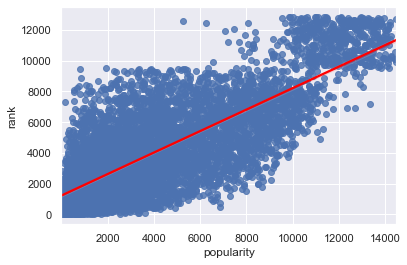

In [11]:
# ratings versus popularity regression plot
sb.set(color_codes=True)
ax = sb.regplot(x="popularity", y="rank", data=anime_df,line_kws={'color':'red'})

In [12]:
# anime_df sorted by rank
anime_sorted_rank_df = anime_df.sort_values(by=['rank'])
anime_sorted_rank_df

anime_id                                              title  \
1261      5114                   Fullmetal Alchemist: Brotherhood   
529      32281                                     Kimi no Na wa.   
639      28977                                           Gintama°   
2953     30484                                      Steins;Gate 0   
1475      9253                                        Steins;Gate   
...        ...                                                ...   
6575     19857  Kagachi-sama Onagusame Tatematsurimasu: Netora...   
6581      5054  Kojin Jugyou The Animation: Schoolgirl Ready f...   
6602      3050                                   Panchira Teacher   
6619     13595             Suki de Suki de, Suki de The Animation   
6663     37405                            Dokidoki Little Ooyasan   

                         title_english  \
1261  Fullmetal Alchemist: Brotherhood   
529                         Your Name.   
639                   Gintama Season 4   
2953                               NaN   
1475                       Steins;Gate   
...                                ...   
6575                               NaN   
6581                               NaN   
6602               Panty Flash Teacher   
6619                               NaN   
6663                               NaN   

                                         title_japanese  \
1261                         鋼の錬金術師 FULLMETAL ALCHEMIST   
529                                               君の名は。   
639                                                 銀魂°   
2953                                      シュタインズ・ゲート ゼロ   
1475                                        STEINS;GATE   
...                                                 ...   
6575               かがち様お慰め奉ります ~寝取られ村淫夜噺~ THE ANIMATION   
6581  個人授業 THE ANIMATION～Schoolgirl ready for a priv...   
6602                                         パンチラティーチャー   
6619                          好きで好きで, すきで THE ANIMATION   
6663                                    dokidokiりとる大家さん   

                                         title_synonyms  \
1261  Hagane no Renkinjutsushi: Fullmetal Alchemist,...   
529                                                 NaN   
639                                Gintama&#039; (2015)   
2953                                   Steins,Gate Zero   
1475                                                NaN   
...                                                 ...   
6575                                                NaN   
6581                                       Kojin Jugyou   
6602                                                NaN   
6619                                                NaN   
6663                                                NaN   

                                              image_url   type        source  \
1261  https://myanimelist.cdn-dena.com/images/anime/...     TV         Manga   
529   https://myanimelist.cdn-dena.com/images/anime/...  Movie      Original   
639   https://myanimelist.cdn-dena.com/images/anime/...     TV         Manga   
2953  https://myanimelist.cdn-dena.com/images/anime/...     TV  Visual novel   
1475  https://myanimelist.cdn-dena.com/images/anime/...     TV  Visual novel   
...                                                 ...    ...           ...   
6575  https://myanimelist.cdn-dena.com/images/anime/...    OVA  Visual novel   
6581  https://myanimelist.cdn-dena.com/images/anime/...    OVA         Manga   
6602  https://myanimelist.cdn-dena.com/images/anime/...    OVA      Original   
6619  https://myanimelist.cdn-dena.com/images/anime/...    OVA         Manga   
6663  https://myanimelist.cdn-dena.com/images/anime/...    OVA         Other   

      episodes            status  ...                  broadcast  \
1261        64   Finished Airing  ...     Sundays at 17:00 (JST)   
529          1   Finished Airing  ...                        NaN   
639         51   Finished Airing  ...  Wednesdays at 18:00 (JST)   
2953        23  Curre

In [13]:
# anime_df sorted by popularity
anime_sorted_popularity_df = anime_df.sort_values(by=['popularity'])
anime_sorted_popularity_df

anime_id                                              title  \
3802      1535                                         Death Note   
3897     16498                                 Shingeki no Kyojin   
3009     11757                                   Sword Art Online   
1261      5114                   Fullmetal Alchemist: Brotherhood   
4215     30276                                      One Punch Man   
...        ...                                                ...   
6648     37859  Free! Movie 2: Timeless Medley - Yakusoku: Cha...   
6644     37860    Free!: Take Your Marks: Character Butai Aisatsu   
6640     37814     Inazuma Eleven Reloaded: Reformation of Soccer   
6659     37493                              Watashitachi no Mirai   
6661     37494                             Chikyuu to no Yakusoku   

                         title_english  \
3802                        Death Note   
3897                   Attack on Titan   
3009                  Sword Art Online   
1261  Fullmetal Alchemist: Brotherhood   
4215                     One Punch Man   
...                                ...   
6648                               NaN   
6644                               NaN   
6640                               NaN   
6659                               NaN   
6661                               NaN   

                                title_japanese  \
3802                                     デスノート   
3897                                     進撃の巨人   
3009                              ソードアート・オンライン   
1261                鋼の錬金術師 FULLMETAL ALCHEMIST   
4215                                    ワンパンマン   
...                                        ...   
6648  劇場版 Free!-Timeless Medley- 約束 キャラクター舞台挨拶   
6644     特別版 Free!-Take Your Marks- キャラクター舞台挨拶   
6640             イナズマイレブン リローデッド ～サッカーの変革へんかく～   
6659                                    私たちの未来   
6661                                    地球との約束   

                                         title_synonyms  \
3802                                                 DN   
3897                                                AoT   
3009                                         S.A.O, SAO   
1261  Hagane no Renkinjutsushi: Fullmetal Alchemist,...   
4215                  One Punch-Man, One-Punch Man, OPM   
...                                                 ...   
6648                                                NaN   
6644                                                NaN   
6640                                                NaN   
6659                                                NaN   
6661                                                NaN   

                                              image_url     type       source  \
3802  https://myanimelist.cdn-dena.com/images/anime/...       TV        Manga   
3897  https://myanimelist.cdn-dena.com/images/anime/...       TV        Manga   
3009  https://myanimelist.cdn-dena.com/images/anime/...       TV  Light novel   
1261  https://myanimelist.cdn-dena.com/images/anime/...       TV        Manga   
4215  https://myanimelist.cdn-dena.com/images/anime/...       TV    Web manga   
...                                                 ...      ...          ...   
6648  https://myanimelist.cdn-dena.com/images/anime/...    Movie     Original   
6644  https://myanimelist.cdn-dena.com/images/anime/...    Movie     Original   
6640  https://myanimelist.cdn-dena.com/images/anime/...  Special         Game   
6659  https://myanimelist.cdn-dena.com/images/anime/...      OVA     Original   
6661  https://myanimelist.cdn-dena.com/images/anime/...      OVA     Original   

      episodes           status  ...                  broadcast  \
3802        37  Finished Airing  ...  Wednesdays at 00:56 (JST)   
3897        25  Finished Airing  ...     Sundays at 01:58 (JST)   
3009        25  Finished Airing  ...     Sundays at 00:00 (JST)   
1261        64  Finished Airing  ...     Sundays at 17:00 (JST)   
4215        12  Finished Airing  ...     Mondays at 01

Because we are primarily concerned with how highly rated an anime is, we will be focussing on the rank of an anime. In the following section, it is further established that popular anime is generally high in rank.

#### **1.1.1** Correlation of Feature Variables

These are correlation tables for the quantatative variables that we will use for analysis.

anime_id  episodes    airing     score  scored_by      rank  \
anime_id         1.000000 -0.109610  0.223734 -0.223733  -0.046057  0.274671   
episodes        -0.109610  1.000000 -0.037289  0.076875   0.068544 -0.049064   
airing           0.223734 -0.037289  1.000000 -0.066910  -0.046482  0.100467   
score           -0.223733  0.076875 -0.066910  1.000000   0.381926 -0.898747   
scored_by       -0.046057  0.068544 -0.046482  0.381926   1.000000 -0.356686   
rank             0.274671 -0.049064  0.100467 -0.898747  -0.356686  1.000000   
popularity       0.205813 -0.009545  0.079229 -0.688492  -0.425719  0.777302   
members         -0.032301  0.079572 -0.030711  0.415626   0.987107 -0.391524   
favorites       -0.054066  0.106804 -0.004717  0.256094   0.793949 -0.208503   
duration_min    -0.205838 -0.105711 -0.086957  0.298989   0.046203 -0.294528   
aired_from_year  0.623290 -0.147920  0.142681  0.042159   0.110892 -0.063543   

                 popularity   members  favorites  duration_min  \
anime_id           0.205813 -0.032301  -0.054066     -0.205838   
episodes          -0.009545  0.079572   0.106804     -0.105711   
airing             0.079229 -0.030711  -0.004717     -0.086957   
score             -0.688492  0.415626   0.256094      0.298989   
scored_by         -0.425719  0.987107   0.793949      0.046203   
rank               0.777302 -0.391524  -0.208503     -0.294528   
popularity         1.000000 -0.474798  -0.210745     -0.159596   
members           -0.474798  1.000000   0.781565      0.039457   
favorites         -0.210745  0.781565   1.000000      0.002669   
duration_min      -0.159596  0.039457   0.002669      1.000000   
aired_from_year   -0.236951  0.135725   0.031254     -0.183812   

                 aired_from_year  
anime_id                0.623290  
episodes               -0.147920  
airing                  0.142681  
score                   0.042159  
scored_by               0.110892  
rank                   -0.063543  
popularity             -0.236951  
members                 0.135725  
favorites               0.031254  
duration_min           -0.183812  
aired_from_year         1.000000

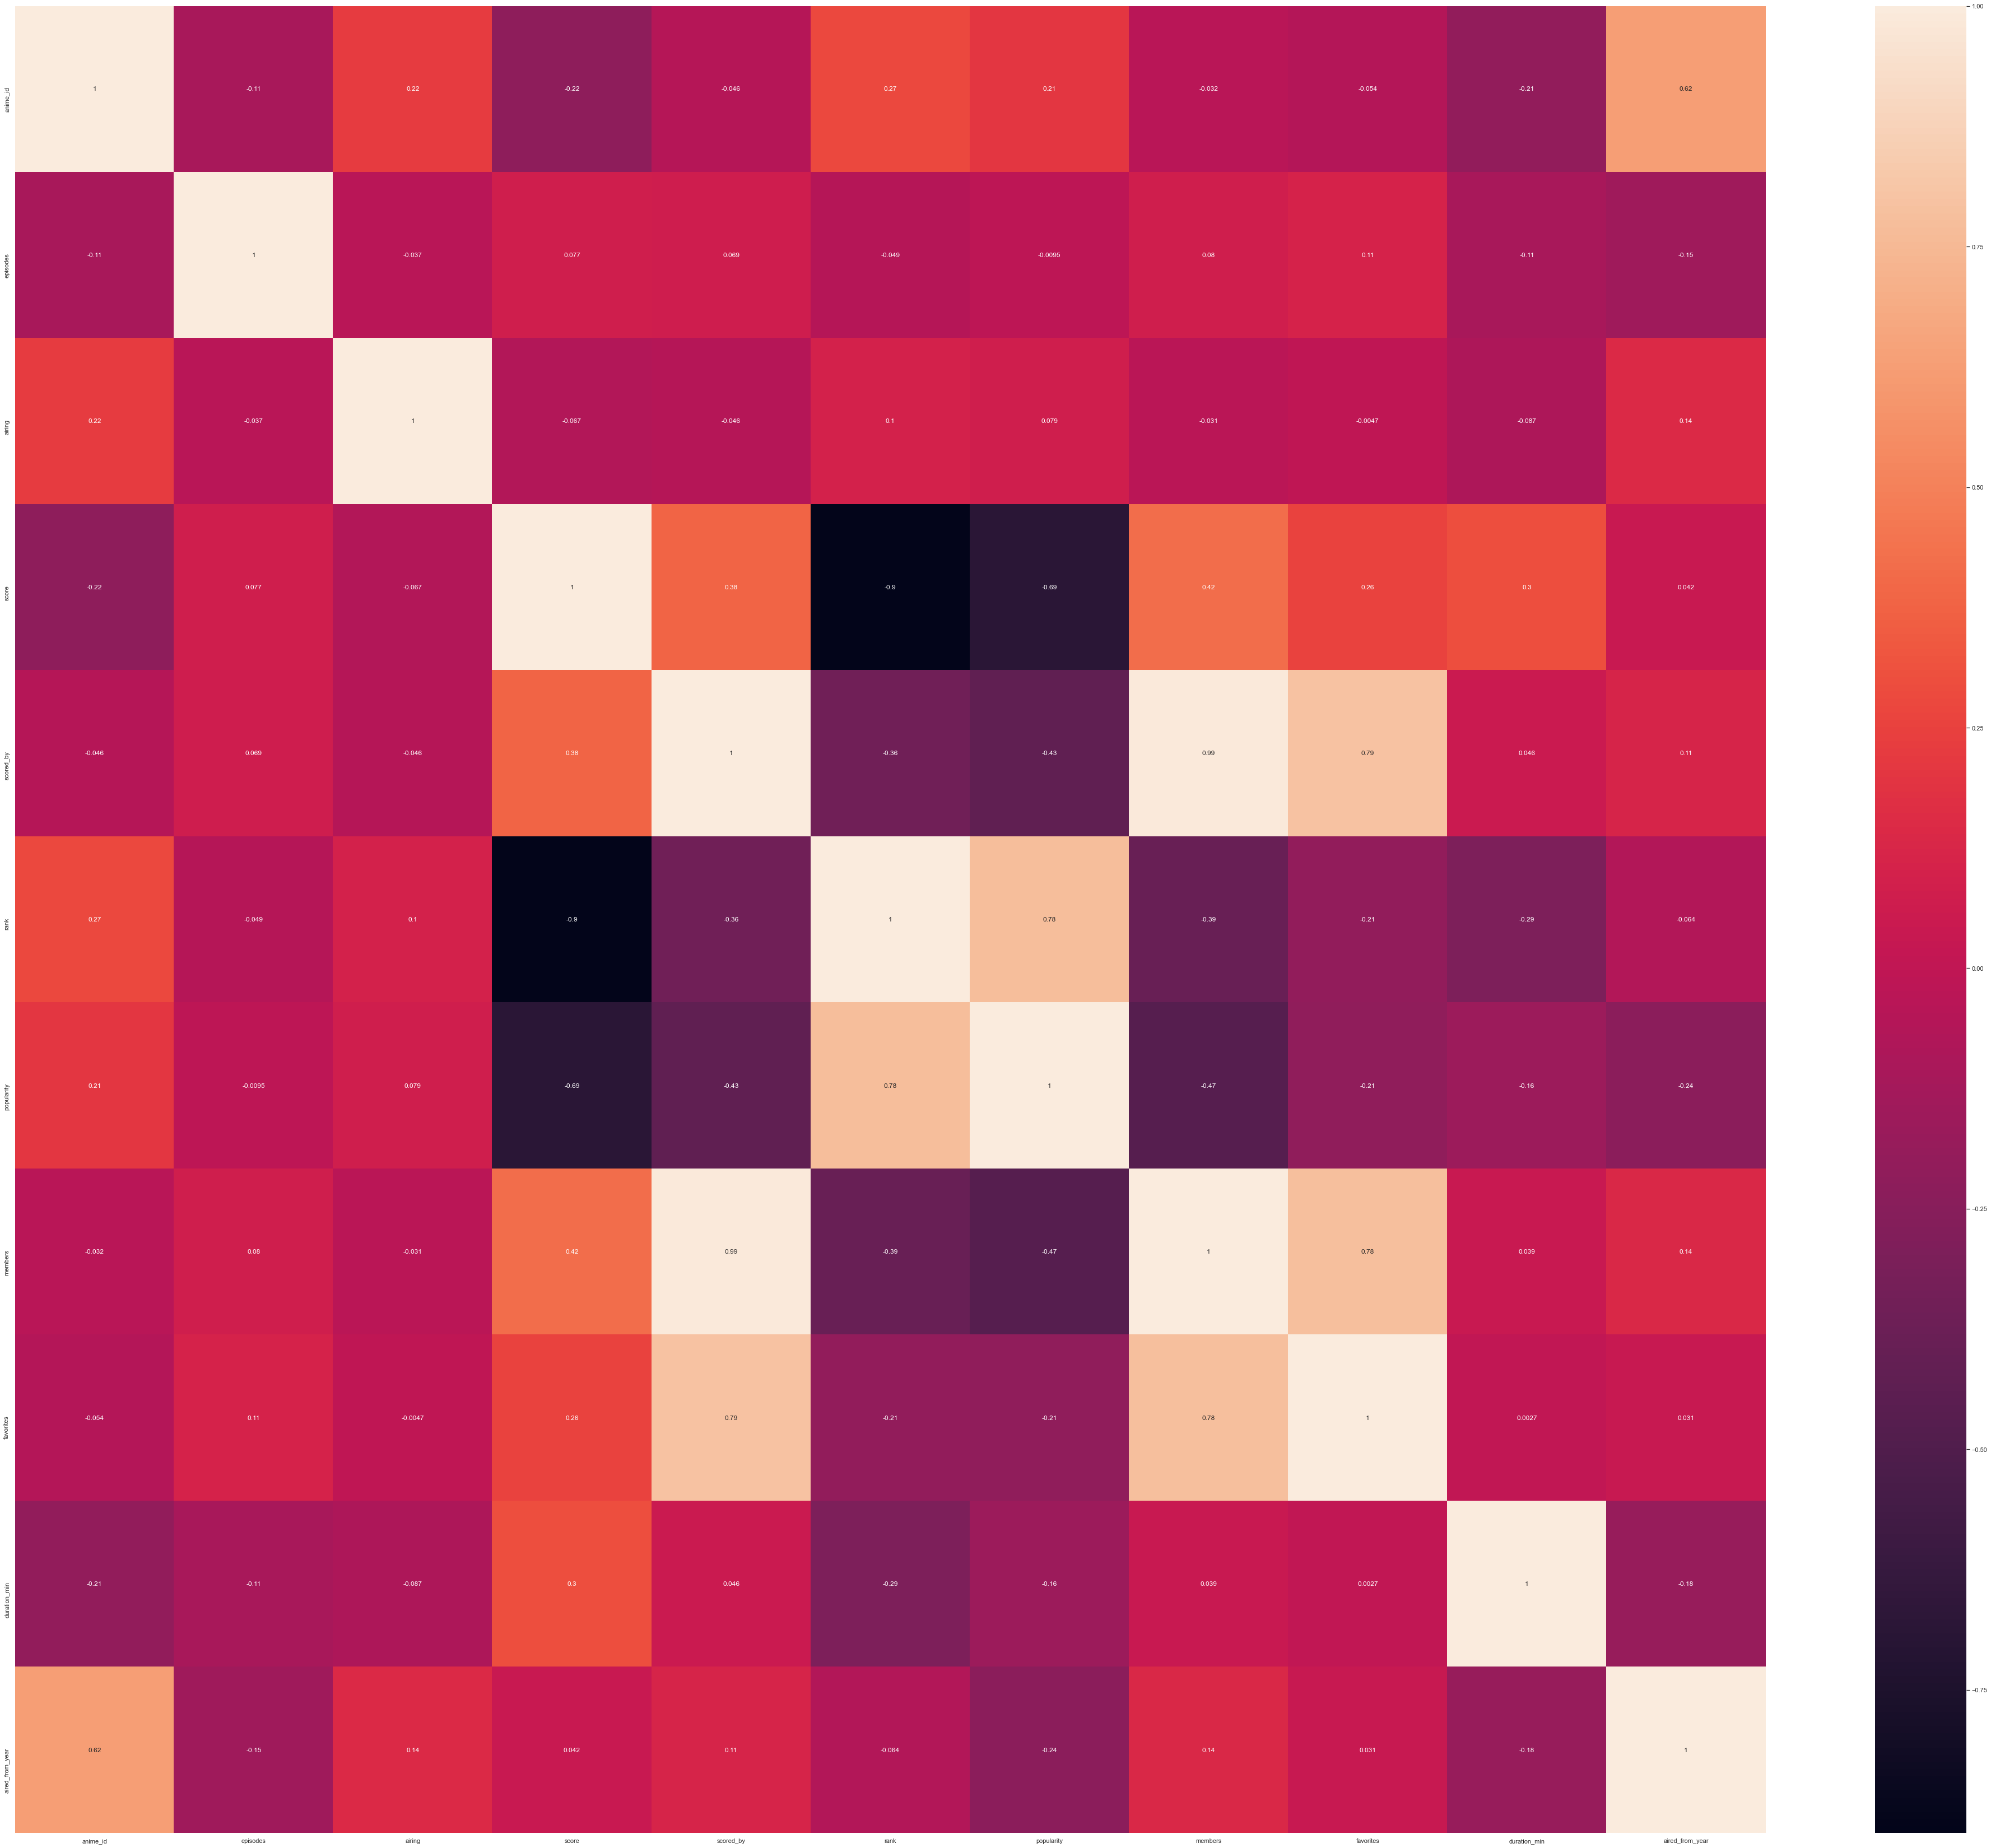

In [14]:
anime_corr = anime_df.corr(method='pearson')

# heatmap for easier visualization
sb.set(rc={'figure.figsize':(10,10)})
sb.heatmap(anime_corr, annot=True)

# correlation matrix
anime_corr

As we can see in the correlation matrix above, the correlation between rank and popularity is 0.777302, indicating that there is a significant association between the rank of an anime and its popularity. 

### **1.2** Score Distribution of All Data

This is the distribution of scores created by the users according to the dataframe. The average score is **6.848998200359928** for all scores according to the distribution.

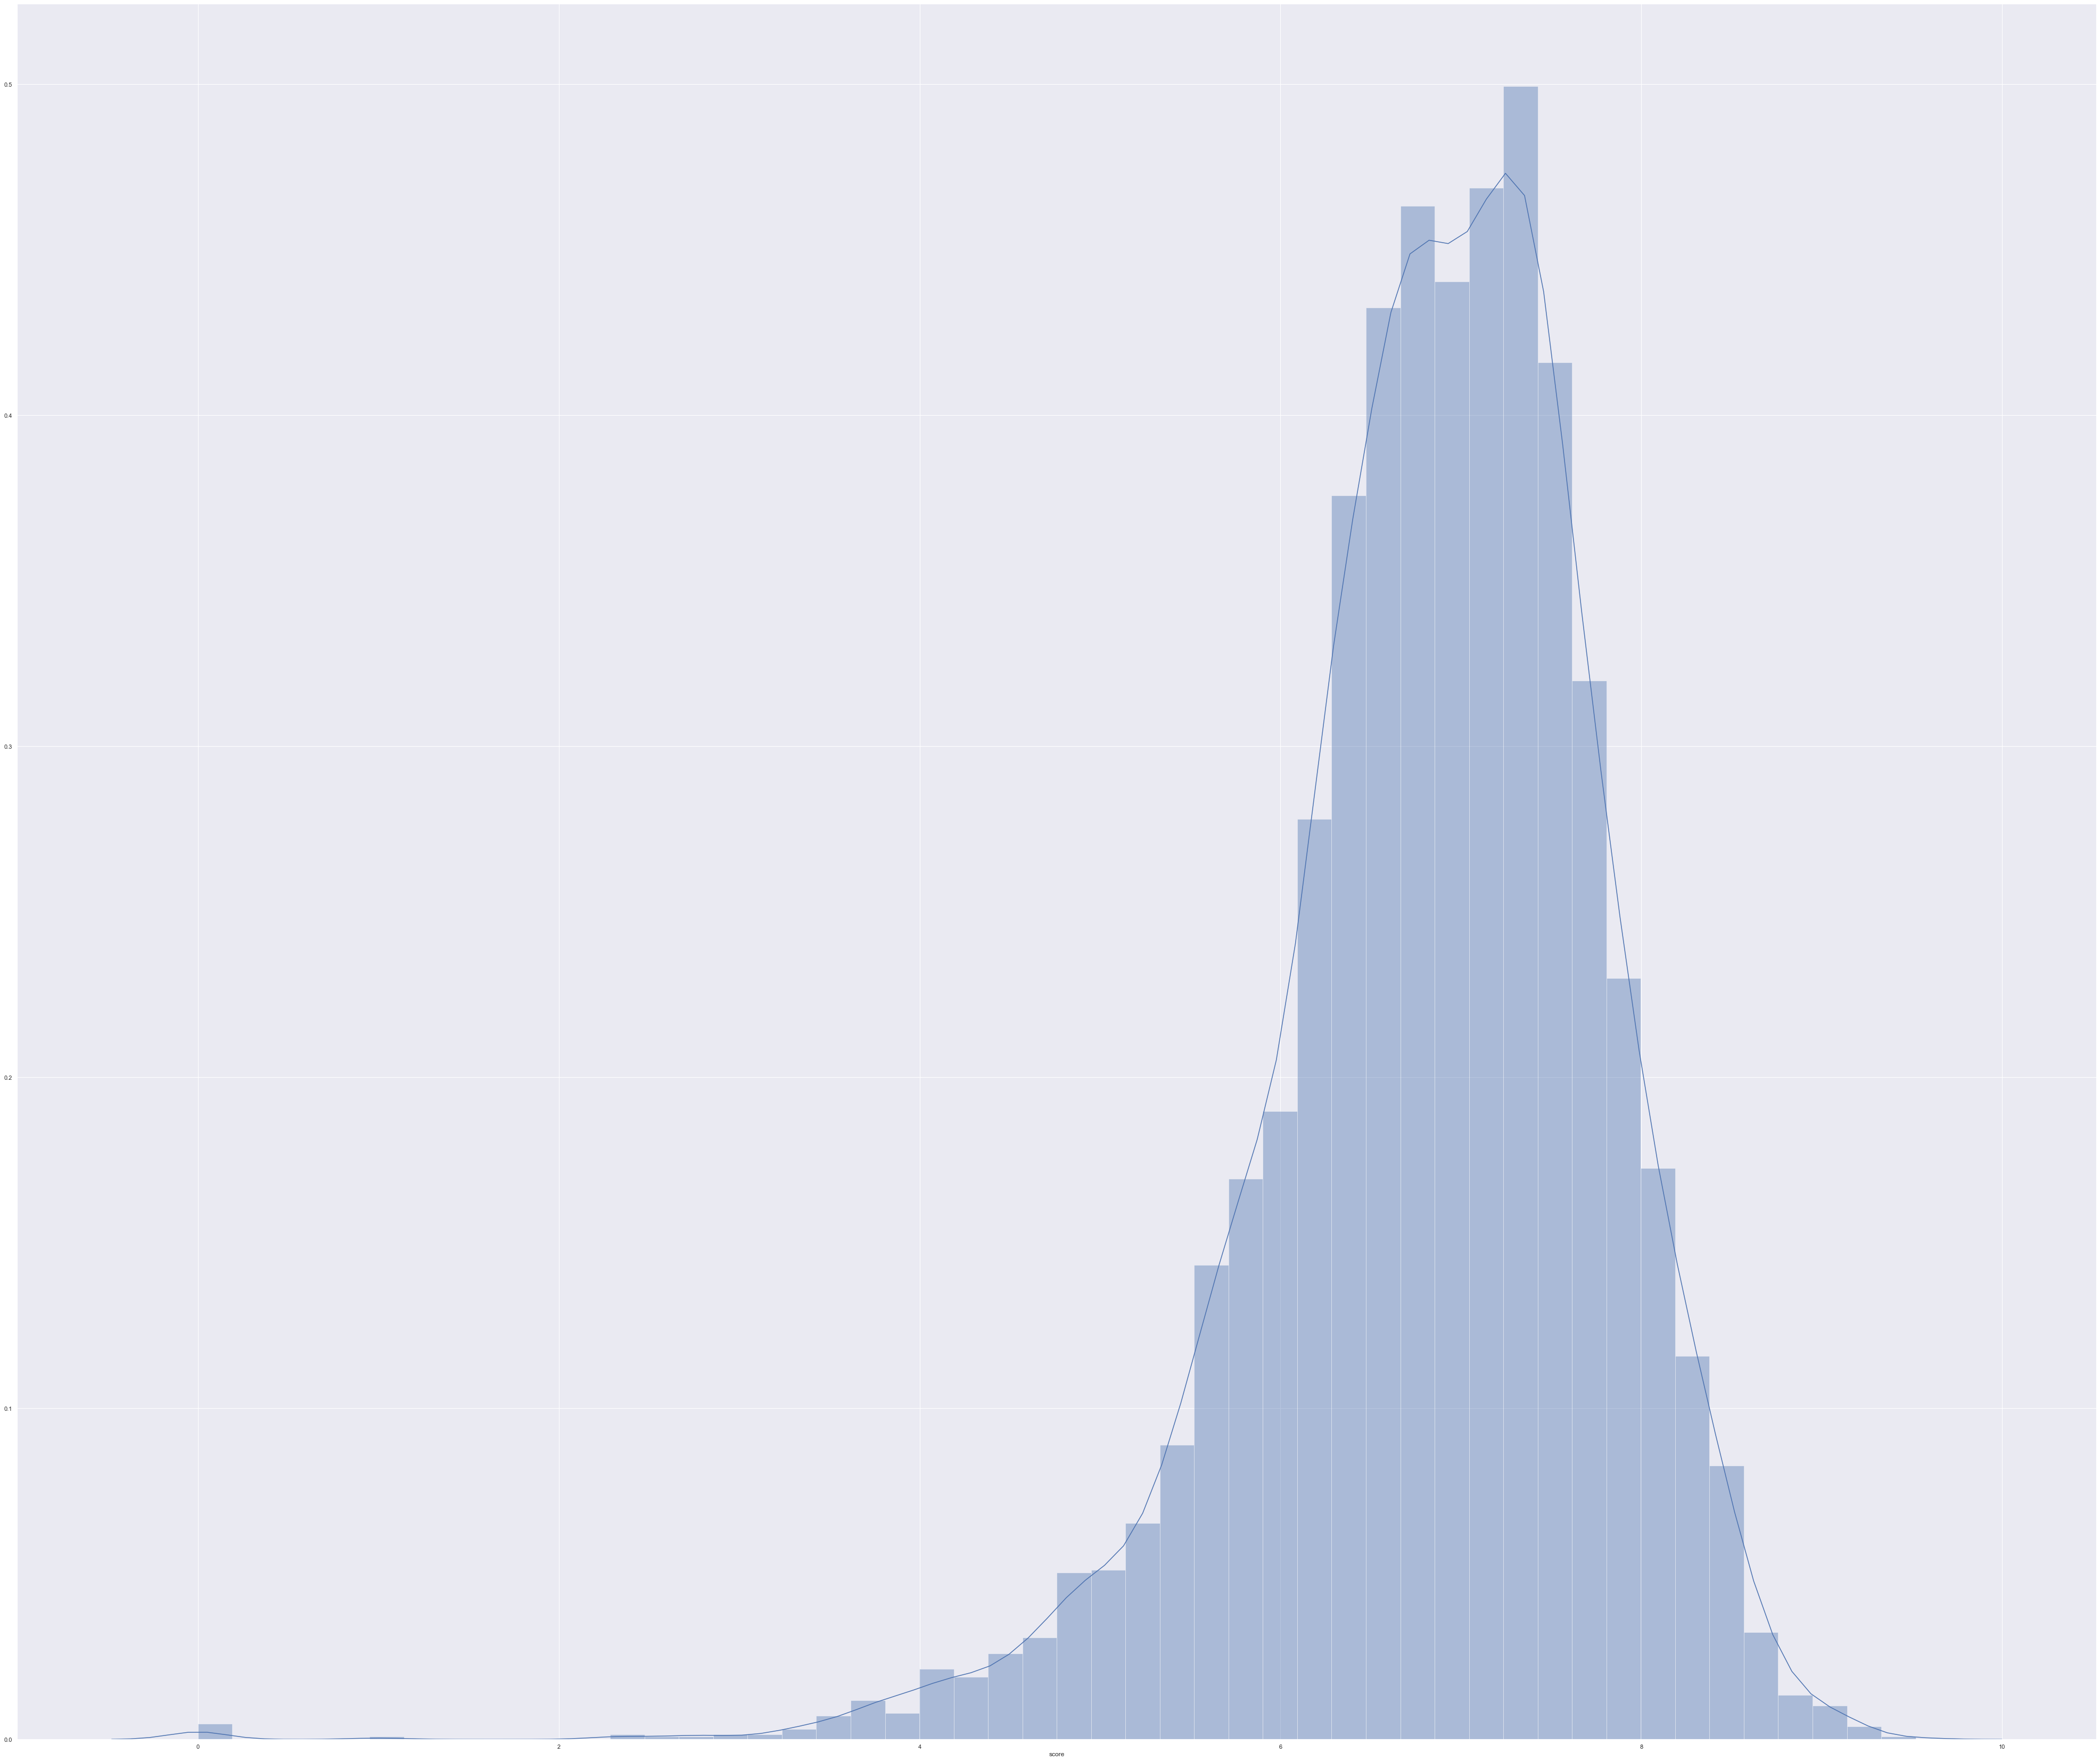

In [15]:
# distribution plot of scores
ax = sb.distplot(anime_df['score'])

In [16]:
# mean of scores
average_score = anime_df['score'].mean()
average_score

6.848998200359928

### **1.3** Scores and Rank by Qualatative Variables
We want to visualize the categorical variables that can contribute to an anime's popularity. Although we cannot build models on categorical variables, it is helpful to visualize what factors contribute to an anime's popularity currently.

Here, we see the distribution and means of the categorical variables that I think have the most impact on an anime's popularity, which are:
1. Genre
2. Production Studio
3. Year of Airing
4. Name of Anime

Note that the Name of Anime categorical variable depends on the viewer Animelists and ratings, which will require merging `anime_df` and `animelist_df`.

#### **1.3.1** Genres
TODO: description of genres

TODO: genres

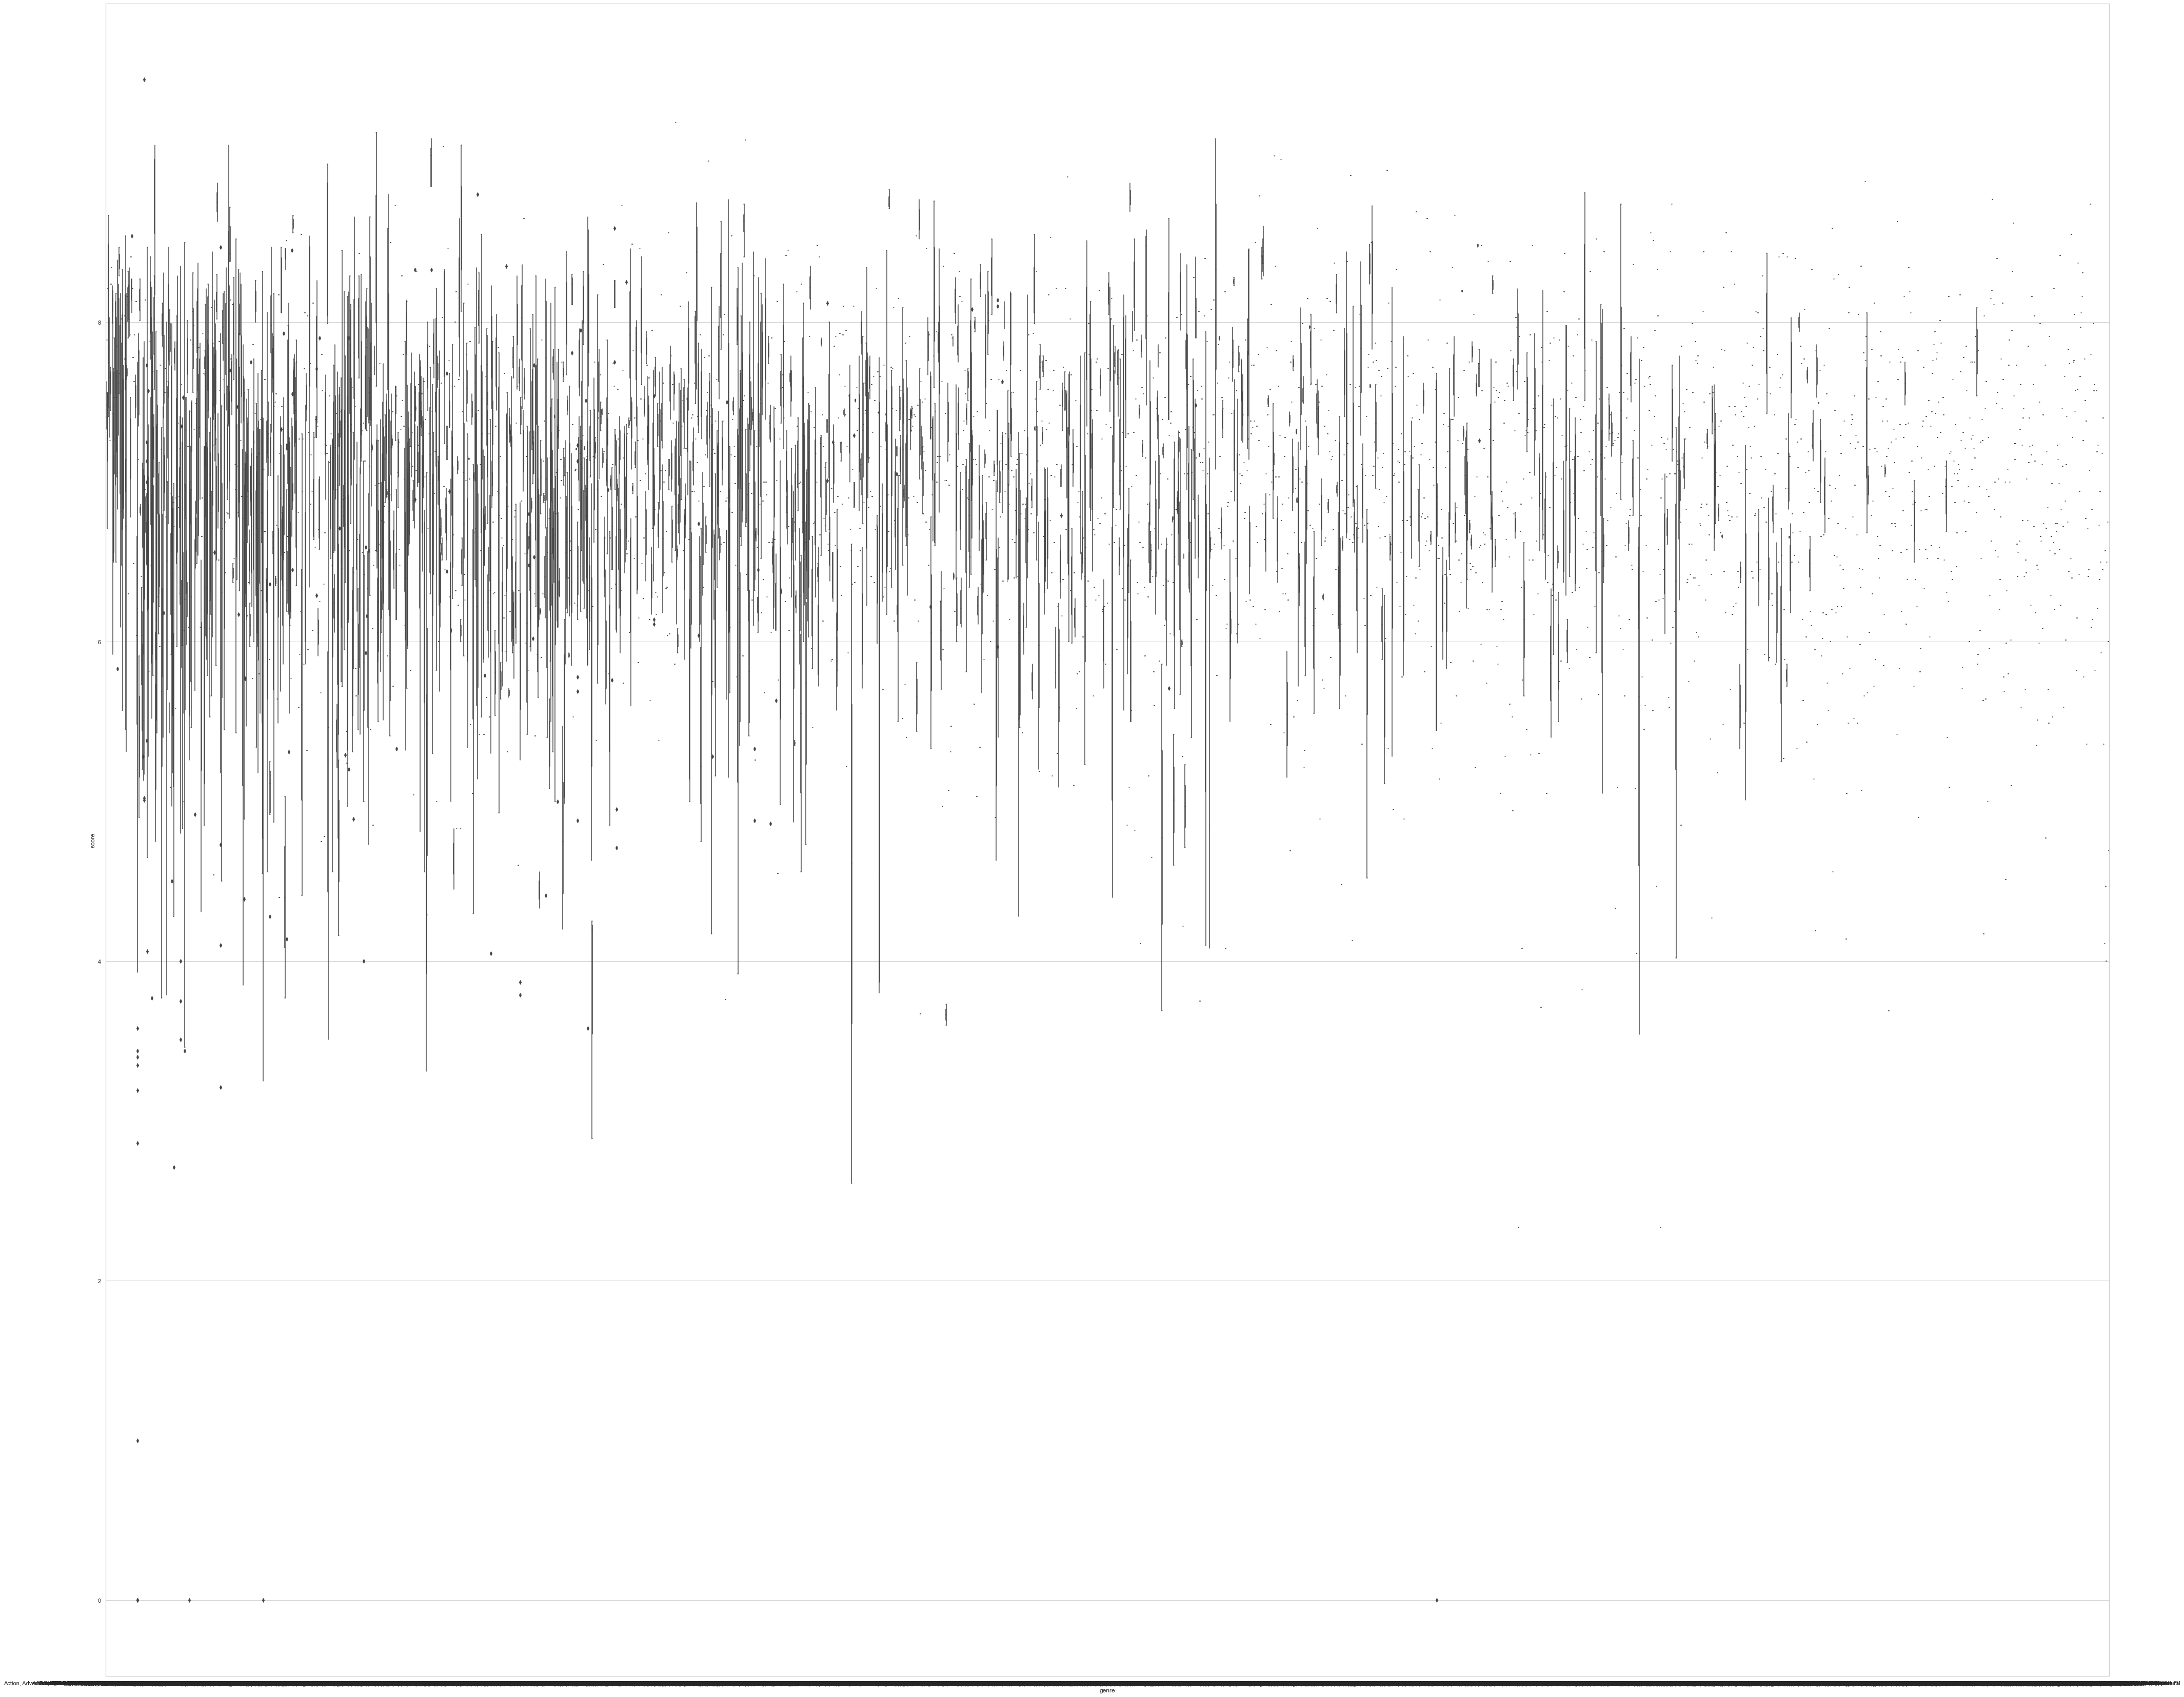

In [17]:
# boxplot of mean scores per genre
# TODO
sb.set(style="whitegrid")
ax = sb.boxplot(x='genre', y='score', data=anime_df)

In [18]:
# mean rank per genre
# TODO

#### **1.3.2** Production Studio
TODO: description of genres

In [19]:
# boxplot of mean scores per studio
# NOTE: click on image to enlarge for detailed view
sb.set(style="whitegrid")
sb.set(rc={'figure.figsize':(700,60)})
ax = sb.boxplot(x='studio', y='score', data=anime_df)

In [20]:
# sorted by the highest ranked production studio
anime_studio_means = anime_df[['rank','studio']].groupby(['studio']).mean()
anime_studio_means = anime_studio_means.sort_values(by=['rank'])
anime_studio_means

rank
studio                                
Artland, Magic Bus                 6.0
J.C.Staff, Egg Firm               65.5
Studio Chizu                      68.0
Madhouse, Satelight, Graphinica   92.0
Xebec, AIC                       131.0
...                                ...
Sugar Boy, Blue Cat                NaN
Suzuki Mirano                      NaN
T-Rex                              NaN
Triple X                           NaN
Y.O.U.C                            NaN

[711 rows x 1 columns]

In [21]:
# number of anime produced by each studio
anime_year_counts = anime_df[['rank', 'studio']].groupby(['studio']).count()
anime_year_counts = anime_year_counts.sort_values(['rank'], ascending=False)
anime_year_counts

rank
studio                   
Toei Animation        403
Sunrise               277
Madhouse              241
Studio Pierrot        235
J.C.Staff             231
...                   ...
Chippai                 0
Circle Tribute          0
Majin                   0
Collaboration Works     0
Media Bank              0

[711 rows x 1 columns]

In [22]:
# distribution of number of anime produced by each production studio
# TODO

From the boxplot above, we can see that some studios produce anime that is more highly rated. As such, our modelling should include the studio as a categorical variable.

#### **1.3.3** Airing Year
The airing year refers to the year that the anime is released. Anime may have differing popularities depending on recency, and the following EDA serves to provide some analysis as to whether airing date affects rank or not.

In [23]:
# boxplot of mean scores per year
# NOTE: click on image to enlarge for detailed view
sb.set(rc={'figure.figsize':(300,60)})
ax = sb.boxplot(x='aired_from_year', y='score', data=anime_df)

In [24]:
# distribution of number of scores per airing year
# TODO

In [25]:
# sorted by the highest ranked airing years
anime_year_means = anime_df[['rank', 'aired_from_year']].groupby(['aired_from_year']).mean()
anime_year_means = anime_year_means.sort_values(by=['rank'], ascending=True)
anime_year_means

rank
aired_from_year              
1978.0            3068.272727
2008.0            3143.991031
1995.0            3156.274194
2007.0            3435.382883
2005.0            3464.925714
...                       ...
1944.0            8749.000000
1943.0            8978.500000
1962.0            9606.000000
1942.0           10114.000000
1961.0           11453.000000

[66 rows x 1 columns]

In [26]:
# number of anime aired in each year
anime_year_counts = anime_df[['rank', 'aired_from_year']].groupby(['aired_from_year']).count()
anime_year_counts

rank
aired_from_year      
1942.0              1
1943.0              2
1944.0              1
1945.0              1
1957.0              1
...               ...
2014.0            403
2015.0            463
2016.0            546
2017.0            496
2018.0            191

[66 rows x 1 columns]

From the outputs of the box plots and the sorting by rank, it appears that there is not a significant impact of airing day on popularity. Thus, we will not be using airing date as a categorical variable in our analysis.

#### **1.3.4** Source

Source refers to the original source for the given anime (ie. the anime that the source was adapted from).

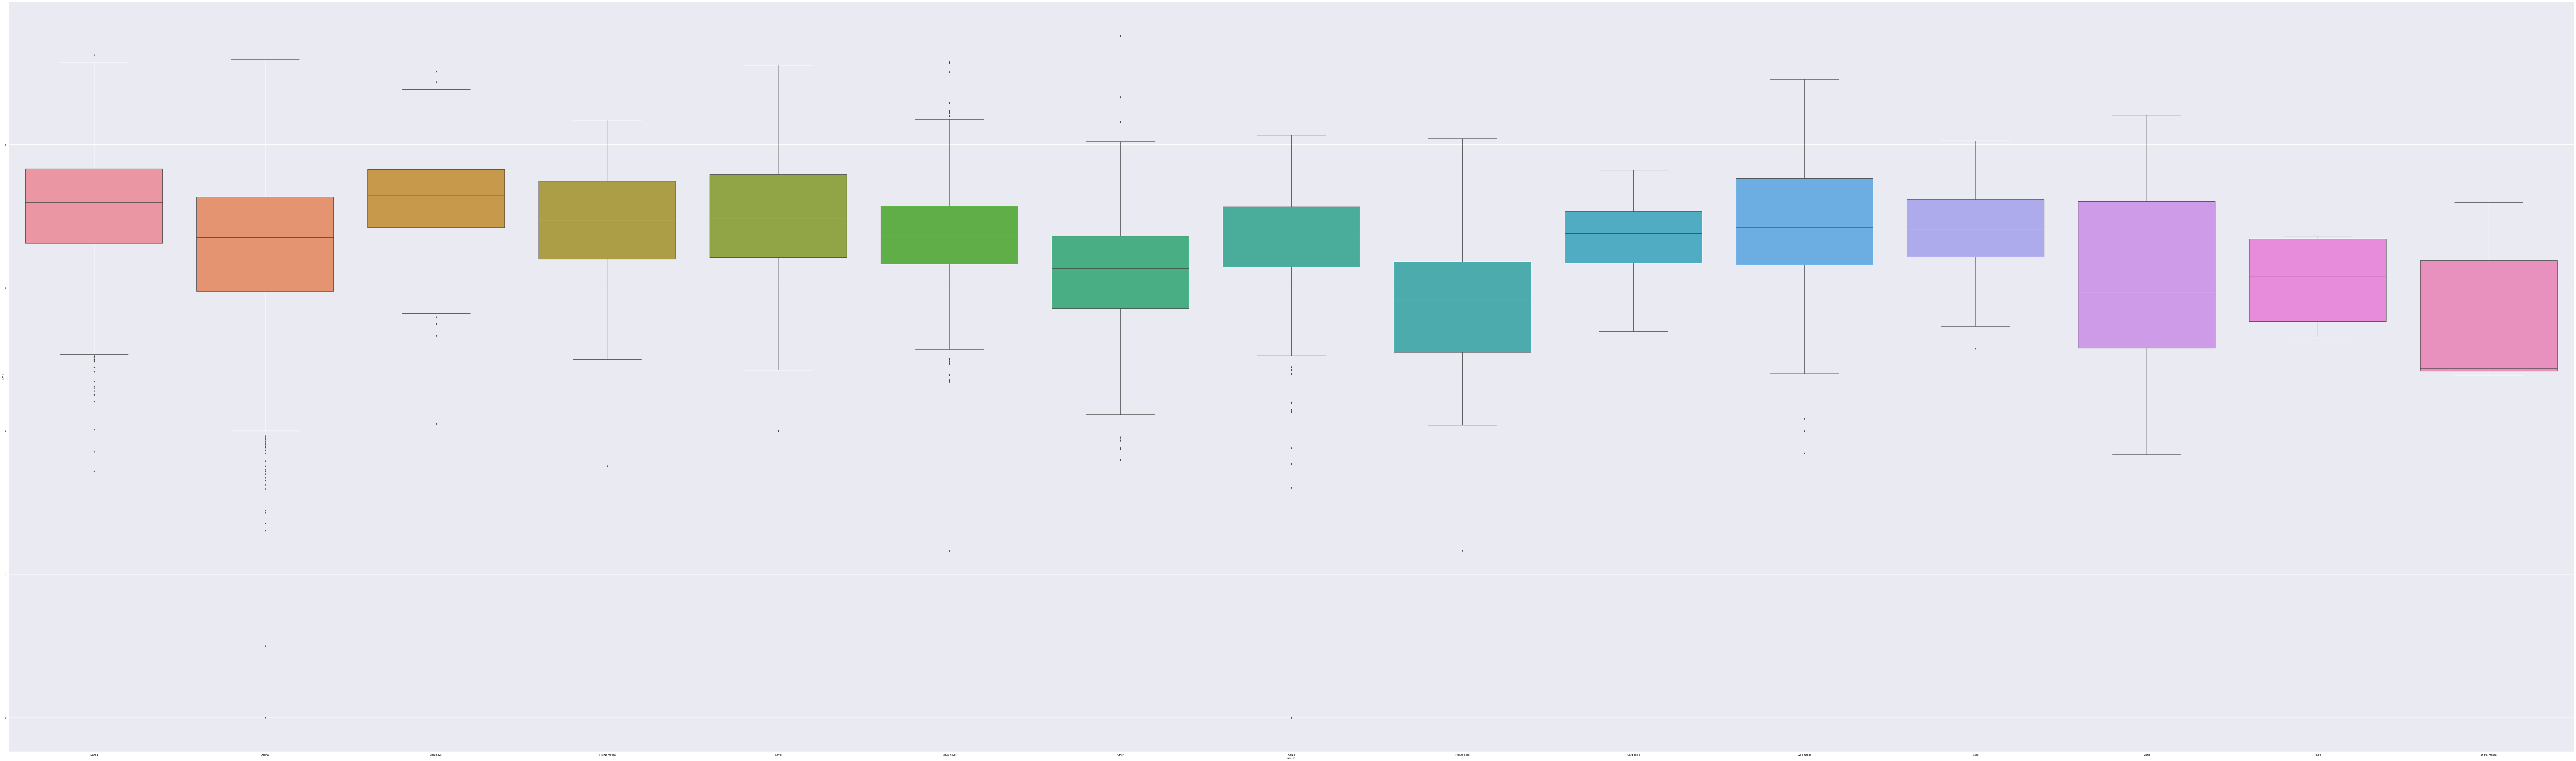

In [27]:
sb.set(rc={'figure.figsize':(200,60)})
ax = sb.boxplot(x='source', y='score', data=anime_df)

In [28]:
# sorted by the highest ranked sources
anime_source_means = anime_df[['rank', 'source']].groupby(['source']).mean()
anime_source_means = anime_year_means.sort_values(by=['rank'], ascending=True)
anime_source_means

rank
aired_from_year              
1978.0            3068.272727
2008.0            3143.991031
1995.0            3156.274194
2007.0            3435.382883
2005.0            3464.925714
...                       ...
1944.0            8749.000000
1943.0            8978.500000
1962.0            9606.000000
1942.0           10114.000000
1961.0           11453.000000

[66 rows x 1 columns]

### **1.4** Title Frequency

This is for evaluation of ratings per title by users per anime title.

In [29]:
# sb.set(rc={'figure.figsize':(800,60)})
# ax = sb.boxplot(x='title', y='score', data=merged_anime_df)

## **2.** Feature Selection/Extraction

**notes:**
* sort by popularity

for reference, the columns are:

['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme', 'duration_min',
       'aired_from_year']

### **2.1** Dropping Uncessary Categorical Variables

In [30]:
# dropping uncessary features
# new_anime_df = merged_anime_df.groupby(['source'])
new_anime_df = merged_anime_df[['anime_id', 'username', 'title', 'score', 'scored_by', 'rank', 'popularity', 'members', 'source', 'favorites', 'studio', 'genre', 'aired_from_year']]
new_anime_df

anime_id       username                               title  score  \
0               21       karthiga                           One Piece   8.54   
1               21      Damonashu                           One Piece   8.54   
2               21          bskai                           One Piece   8.54   
3               21         Slimak                           One Piece   8.54   
4               21  MistButterfly                           One Piece   8.54   
...            ...            ...                                 ...    ...   
31284025     37896     animekanji                  Ling Yu 6th Season   7.80   
31284026     37896      AnimeKhor                  Ling Yu 6th Season   7.80   
31284027     37620         FeliX_     CMFU Xueyuan: Shenshi Ji Jijian   4.00   
31284028     37620    gasparsousa     CMFU Xueyuan: Shenshi Ji Jijian   4.00   
31284029     36818         Azurii  Chikyuu wa Guruguru Merry-Go-Round   8.33   

          scored_by     rank  popularity  members    source  favorites  \
0            423868     91.0          35   720133     Manga      69760   
1            423868     91.0          35   720133     Manga      69760   
2            423868     91.0          35   720133     Manga      69760   
3            423868     91.0          35   720133     Manga      69760   
4            423868     91.0          35   720133     Manga      69760   
...             ...      ...         ...      ...       ...        ...   
31284025          5  11128.0       13725       71     Novel          0   
31284026          5  11128.0       13725       71     Novel          0   
31284027          2   9903.0       12909      104     Novel          0   
31284028          2   9903.0       12909      104     Novel          0   
31284029          6   9867.0       14119       38  Original          0   

                                         studio  \
0                                Toei Animation   
1                                Toei Animation   
2                                Toei Animation   
3                                Toei Animation   
4                                Toei Animation   
...                                         ...   
31284025  Shanghai Foch Film Culture Investment   
31284026  Shanghai Foch Film Culture Investment   
31284027  Shanghai Foch Film Culture Investment   
31284028  Shanghai Foch Film Culture Investment   
31284029                     D &amp; D Pictures   

                                                      genre  aired_from_year  
0         Action, Adventure, Comedy, Super Power, Drama,...           1999.0  
1         Action, Adventure, Comedy, Super Power, Drama,...           1999.0  
2         Action, Adventure, Comedy, Super Power, Drama,...           1999.0  
3         Action, Adventure, Comedy, Super Power, Drama,...           1999.0  
4         Action, Adventure, Comedy, Super Power, Drama,...           1999.0  
...                                                     ...              ...  
31284025                                            Fantasy           2018.0  
31284026                                            Fantasy           2018.0  
31284027                            Sports, Romance, School           2017.0  
31284028                            Sports, Romance, School           2017.0  
31284029                                        Kids, Space           2017.0  

[31284030 rows x 13 columns]

### **2.2** Encoding Categorical Variables

We have to encode the categorical variables also going to be used for our analysis. This includes:
* Genre
* Studio
* Title of Anime

In [31]:
# studio
encoder = LabelEncoder()
studio_labels = encoder.fit_transform(new_anime_df['studio'])

# mappings
studio_mappings = {
    index: label for index, label in enumerate(encoder.classes_)
}
studio_mappings # from the output, there are 710 studios in total

{0: '10Gauge',
 1: '2:10 Animation',
 2: '8bit',
 3: 'A-1 Pictures',
 4: 'A-1 Pictures, Bridge',
 5: 'A-1 Pictures, CloverWorks',
 6: 'A-1 Pictures, Ordet',
 7: 'A-1 Pictures, TROYCA',
 8: 'A-1 Pictures, Trigger, CloverWorks',
 9: 'A-Line',
 10: 'A-Real',
 11: 'A.C.G.T.',
 12: 'ACC Production',
 13: 'AIC',
 14: 'AIC A.S.T.A.',
 15: 'AIC Build',
 16: 'AIC Classic',
 17: 'AIC Frontier',
 18: 'AIC Plus+',
 19: 'AIC Spirits',
 20: 'AIC Spirits, Asread',
 21: 'AIC Spirits, BeSTACK',
 22: 'AIC Spirits, Digital Frontier',
 23: 'AIC Spirits, Group TAC',
 24: 'AIC Takarazuka',
 25: 'AIC, APPP',
 26: 'AIC, Animate Film',
 27: 'AIC, Artmic',
 28: 'AIC, Artmic, Animate Film',
 29: 'AIC, Artmic, Darts',
 30: 'AIC, BeSTACK',
 31: 'AIC, Darts',
 32: 'AIC, Remic',
 33: 'AIC, Studio Hakk',
 34: 'APPP',
 35: 'AT-2',
 36: 'AXsiZ',
 37: 'Actas',
 38: 'Actas, Bee Media',
 39: 'Actas, Brain&#039;s Base',
 40: 'Actas, Studio 3Hz',
 41: 'Actas, SynergySP',
 42: 'Actas, TMS Entertainment',
 43: 'Agent 21',
 44

In [32]:
# source
source_labels = encoder.fit_transform(new_anime_df['source'])

# mappings
source_mappings = {
    index: label for index, label in enumerate(encoder.classes_)
}
source_mappings

{0: '4-koma manga',
 1: 'Book',
 2: 'Card game',
 3: 'Digital manga',
 4: 'Game',
 5: 'Light novel',
 6: 'Manga',
 7: 'Music',
 8: 'Novel',
 9: 'Original',
 10: 'Other',
 11: 'Picture book',
 12: 'Radio',
 13: 'Visual novel',
 14: 'Web manga'}

In [33]:
# title
title_labels = encoder.fit_transform(new_anime_df['title'])

# mappings
title_mappings = {
    index: label for index, label in enumerate(encoder.classes_)
}
title_mappings

{0: '"Bungaku Shoujo" Kyou no Oyatsu: Hatsukoi',
 1: '"Bungaku Shoujo" Memoire',
 2: '"Bungaku Shoujo" Movie',
 3: '"Eikou Naki Tensai-tachi" Kara no Monogatari',
 4: '"Eiyuu" Kaitai',
 5: '"Parade" de Satie',
 6: '.hack//G.U. Returner',
 7: '.hack//Gift',
 8: '.hack//Intermezzo',
 9: '.hack//Liminality',
 10: '.hack//Quantum',
 11: '.hack//Quantum: Sore ike! Bokura no Chimuchimu-chan!!',
 12: '.hack//Roots',
 13: '.hack//Sign',
 14: '.hack//Tasogare no Udewa Densetsu',
 15: '.hack//Unison',
 16: '009-1',
 17: '07-Ghost',
 18: '1+2=Paradise',
 19: '100% Pascal-sensei (TV)',
 20: '1000-nen Joou: Queen Millennia',
 21: '11eyes',
 22: '11eyes Picture Drama',
 23: '11eyes: Momoiro Genmutan',
 24: '12-sai.',
 25: '12-sai. 2nd Season',
 26: '12-sai.: Chicchana Mune no Tokimeki',
 27: '12-sai.: Chicchana Mune no Tokimeki 2nd Season',
 28: '15 Bishoujo Hyouryuuki',
 29: '18if',
 30: '21-ji no Onna: Newscaster Katsuragi Miki',
 31: '25-sai no Joshikousei',
 32: '3-Nen D-Gumi Glass no Kamen',
 3

### **2.3** Score Threshold

#### **2.3.1** Updated Correlations

anime_id     score  scored_by      rank  popularity  \
anime_id         1.000000 -0.072264  -0.028818  0.098305   -0.027135   
score           -0.072264  1.000000   0.479132 -0.950317   -0.542213   
scored_by       -0.028818  0.479132   1.000000 -0.405231   -0.515092   
rank             0.098305 -0.950317  -0.405231  1.000000    0.552608   
popularity      -0.027135 -0.542213  -0.515092  0.552608    1.000000   
members         -0.016671  0.512400   0.988339 -0.437513   -0.562642   
favorites       -0.103933  0.459916   0.828411 -0.331757   -0.320899   
aired_from_year  0.768742 -0.028235   0.054498  0.036552   -0.193307   

                  members  favorites  aired_from_year  
anime_id        -0.016671  -0.103933         0.768742  
score            0.512400   0.459916        -0.028235  
scored_by        0.988339   0.828411         0.054498  
rank            -0.437513  -0.331757         0.036552  
popularity      -0.562642  -0.320899        -0.193307  
members          1.000000   0.830466         0.075491  
favorites        0.830466   1.000000        -0.034801  
aired_from_year  0.075491  -0.034801         1.000000

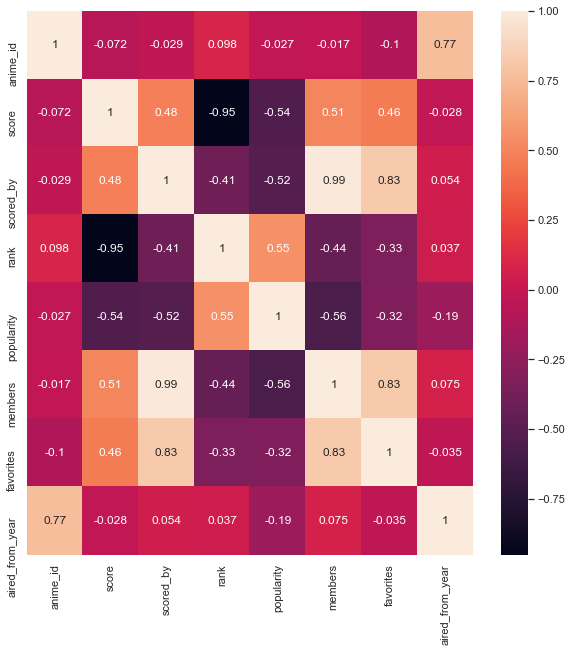

In [37]:
# updated correlation heatmap based on feature variables
updated_anime_corr = new_anime_df.corr(method='pearson')

# heatmap for easier visualization
sb.set(rc={'figure.figsize':(10,10)})
sb.heatmap(updated_anime_corr, annot=True)

# correlation matrix
updated_anime_corr

#### **2.3.2** Score Mean Threshold

Because the feature variables yielded little correlation to the outcome variable (ie. score), we are only going to investigate the anime whose rating pass a threshold. We denote these anime with a binary measure, denoted `above_average`, added to `new_anime_df`.

In [35]:
new_anime_df['score'].mean()

7.580004267672671

In [40]:
# average score is 7.58
# 1 for above average score, 0 for below
pd.options.mode.chained_assignment = None
new_anime_df['above_average'] = np.where(new_anime_df['score'] >= 7.58, '1', '0')
new_anime_df

anime_id       username                               title  score  \
0               21       karthiga                           One Piece   8.54   
1               21      Damonashu                           One Piece   8.54   
2               21          bskai                           One Piece   8.54   
3               21         Slimak                           One Piece   8.54   
4               21  MistButterfly                           One Piece   8.54   
...            ...            ...                                 ...    ...   
31284025     37896     animekanji                  Ling Yu 6th Season   7.80   
31284026     37896      AnimeKhor                  Ling Yu 6th Season   7.80   
31284027     37620         FeliX_     CMFU Xueyuan: Shenshi Ji Jijian   4.00   
31284028     37620    gasparsousa     CMFU Xueyuan: Shenshi Ji Jijian   4.00   
31284029     36818         Azurii  Chikyuu wa Guruguru Merry-Go-Round   8.33   

          scored_by     rank  popularity  members    source  favorites  \
0            423868     91.0          35   720133     Manga      69760   
1            423868     91.0          35   720133     Manga      69760   
2            423868     91.0          35   720133     Manga      69760   
3            423868     91.0          35   720133     Manga      69760   
4            423868     91.0          35   720133     Manga      69760   
...             ...      ...         ...      ...       ...        ...   
31284025          5  11128.0       13725       71     Novel          0   
31284026          5  11128.0       13725       71     Novel          0   
31284027          2   9903.0       12909      104     Novel          0   
31284028          2   9903.0       12909      104     Novel          0   
31284029          6   9867.0       14119       38  Original          0   

                                         studio  \
0                                Toei Animation   
1                                Toei Animation   
2                                Toei Animation   
3                                Toei Animation   
4                                Toei Animation   
...                                         ...   
31284025  Shanghai Foch Film Culture Investment   
31284026  Shanghai Foch Film Culture Investment   
31284027  Shanghai Foch Film Culture Investment   
31284028  Shanghai Foch Film Culture Investment   
31284029                     D &amp; D Pictures   

                                                      genre  aired_from_year  \
0         Action, Adventure, Comedy, Super Power, Drama,...           1999.0   
1         Action, Adventure, Comedy, Super Power, Drama,...           1999.0   
2         Action, Adventure, Comedy, Super Power, Drama,...           1999.0   
3         Action, Adventure, Comedy, Super Power, Drama,...           1999.0   
4         Action, Adventure, Comedy, Super Power, Drama,...           1999.0   
...                                                     ...              ...   
31284025                                            Fantasy           2018.0   
31284026                                            Fantasy           2018.0   
31284027                            Sports, Romance, School           2017.0   
31284028                            Sports, Romance, School           2017.0   
31284029                                        Kids, Space           2017.0   

         above_average  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  
...                ...  
31284025             1  
31284026             1  
31284027             0  
31284028             0  
31284029             1  

[31284030 rows x 14 columns]

## **3.** Modelling 

### **3.1** Baseline Model: Linear Regression

### **3.2** Random Forest Model

### **3.3** Feedforward Perceptron